In [376]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Clustering
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2, whiten
from sklearn.cluster import KMeans
from sklearn import metrics
import math

# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# from acquire_zillow import get_zillow_data_2016
# from acquire_zillow import save_df_2016

# import summarize
# import prepare

## Alternate import: from local CSV file

In [377]:
path = '~/Documents/Coding/Codeup/Coursework/ds-methodologies-exercises/clustering/'
file1 = '2016_Zillow_Data.csv'

In [378]:
df_2016 = pd.read_csv(path+file1)
df_2016.head()

id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  2931667  11016594                   1.00                       nan   
1   475764  14366692                    nan                       nan   
2  2444575  12098116                   1.00                       nan   
3  1584730  12643413                   1.00                       nan   
4  2926916  14432541                    nan                       nan   

          basementsqft          bathroomcnt  bedroomcnt  buildingclasstypeid  \
0                  nan                 2.00           3                  nan   
1                  nan                 3.50           4                  nan   
2                  nan                 3.00           2                  nan   
3                  nan                 2.00           2                  nan   
4                  nan                 2.50           4                  nan   

   buildingqualitytypeid    calculatedbathnbr       ...         \
0                   4.00                 2.00       ...          
1                    nan                 3.50       ...          
2                   4.00                 3.00       ...          
3                   4.00                 2.00       ...          
4                    nan                 2.50       ...          

   propertylandusetypeid.1        propertylandusedesc        storytypeid.1  \
0                      261  Single Family Residential                  nan   
1                      261  Single Family Residential                  nan   
2                      261  Single Family Residential                  nan   
3                      266                Condominium                  nan   
4                      261  Single Family Residential                  nan   

   storydesc  typeconstructiontypeid.1  typeconstructiondesc  id.1  \
0        NaN                       nan                   NaN     0   
1        NaN                       nan                   NaN     1   
2        NaN                       nan                   NaN     2   
3        NaN                       nan                   NaN     3   
4        NaN                       nan                   NaN     4   

   parcelid.1             logerror  transactiondate  
0    11016594                 0.03       2016-01-01  
1    14366692                -0.17       2016-01-01  
2    12098116                -0.00       2016-01-01  
3    12643413                 0.02       2016-01-02  
4    14432541                -0.01       2016-01-02  

[5 rows x 77 columns]

In [379]:
file2 = '2017_Zillow_Data.csv'

In [380]:
df_2017 = pd.read_csv(path+file2)
df_2017.head()

id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1727539  14297519                    nan                       nan   
1  1387261  17052889                    nan                       nan   
2    11677  14186244                    nan                       nan   
3  2288172  12177905                    nan                       nan   
4  1970746  10887214                   1.00                       nan   

          basementsqft          bathroomcnt           bedroomcnt  \
0                  nan                 3.50                 4.00   
1                  nan                 1.00                 2.00   
2                  nan                 2.00                 3.00   
3                  nan                 3.00                 4.00   
4                  nan                 3.00                 3.00   

   buildingclasstypeid  buildingqualitytypeid    calculatedbathnbr  \
0                  nan                    nan                 3.50   
1                  nan                    nan                 1.00   
2                  nan                    nan                 2.00   
3                  nan                   8.00                 3.00   
4                  nan                   8.00                 3.00   

        ...         propertylandusetypeid.1        propertylandusedesc  \
0       ...                          261.00  Single Family Residential   
1       ...                          261.00  Single Family Residential   
2       ...                          261.00  Single Family Residential   
3       ...                          261.00  Single Family Residential   
4       ...                          266.00                Condominium   

         storytypeid.1  storydesc  typeconstructiontypeid.1  \
0                  nan        NaN                       nan   
1                  nan        NaN                       nan   
2                  nan        NaN                       nan   
3                  nan        NaN                       nan   
4                  nan        NaN                       nan   

   typeconstructiondesc  id.1  parcelid.1             logerror  \
0                   NaN     0    14297519                 0.03   
1                   NaN     1    17052889                 0.06   
2                   NaN     2    14186244                 0.01   
3                   NaN     3    12177905                -0.10   
4                   NaN     4    10887214                 0.01   

   transactiondate  
0       2017-01-01  
1       2017-01-01  
2       2017-01-01  
3       2017-01-01  
4       2017-01-01  

[5 rows x 77 columns]

In [381]:
df_2017.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [382]:
df_2017.reset_index()

index       id  parcelid  airconditioningtypeid  \
0          0  1727539  14297519                    nan   
1          1  1387261  17052889                    nan   
2          2    11677  14186244                    nan   
3          3  2288172  12177905                    nan   
4          4  1970746  10887214                   1.00   
5          5  1447245  17143294                    nan   
6          6   781532  12095076                   1.00   
7          7   870991  12069064                    nan   
8          8  1246926  12790562                    nan   
9          9  1585097  11542646                    nan   
10        10  1639362  11104527                   1.00   
11        11  2963523  13984101                    nan   
12        12  2116302  14705431                    nan   
13        13   249412  13944538                  13.00   
14        14  2205733  14731691                    nan   
15        15    43675  17110996                    nan   
16        16  1548721  14375300                  13.00   
17        17  1169121  12045625                   1.00   
18        18   571930  11830315                    nan   
19        19  2712452  14730402                    nan   
20        20  2542130  12325145                   1.00   
21        21  1623211  14387959                    nan   
22        22  1071020  14349322                    nan   
23        23  1794752  11706737                    nan   
24        24  1690166  11671335                   1.00   
25        25  1723297  12531488                    nan   
26        26  1578439  14314879                    nan   
27        27  1718341  11130689                   1.00   
28        28   707014  12036177                    nan   
29        29  1443971  14333888                    nan   
...      ...      ...       ...                    ...   
77583  77583   843538  12651460                    nan   
77584  77584  2417958  10962691                    nan   
77585  77585   197689  11487400                    nan   
77586  77586  1319846  12433997                    nan   
77587  77587  2566638  10855745                   1.00   
77588  77588   248051  12883894                    nan   
77589  77589   620802  12885530                    nan   
77590  77590  2762482  11490983                    nan   
77591  77591  1752516  12401161                    nan   
77592  77592  2549729  11068972                   1.00   
77593  77593  2762480  11490089                    nan   
77594  77594  1006714  12406123                    nan   
77595  77595  2871267  12669704                    nan   
77596  77596  2900077  12410050                    nan   
77597  77597  2913200  11953526                    nan   
77598  77598   347372  11608641                    nan   
77599  77599  1810799  11978003                   1.00   
77600  77600  2747021  11318911                    nan   
77601  77601  1089830  10722237                   1.00   
77602  77602    80446  12055795                    nan   
77603  77603  1635173  12892446                    nan   
77604  77604  1684937  12666457                    nan   
77605  77605  1642435  10858613                   1.00   
77606  77606  1373391  10722691                   1.00   
77607  77607  2274245  12412492                    nan   
77608  77608  2864704  10833991                   1.00   
77609  77609   673515  11000655                    nan   
77610  77610  2968375  17239384                    nan   
77611  77611  1843709  12773139                   1.00   
77612  77612  1187175  12826780                    nan   

       architecturalstyletypeid         basementsqft          bathroomcnt  \
0                           nan                  nan                 3.50   
1                           nan                  nan                 1.00   
2                           nan                  nan                 2.00   
3                           nan                  nan                 3.00   
4                        

In [383]:
# Concatenates 2016 and 2017 df

In [384]:
df = pd.concat([df_2016, df_2017], axis=0)

## Summarize Data

In [385]:
def peekatdata(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())
    return df

def df_value_counts(df):
    for col in df.columns: 
        n = df[col].unique().shape[0] 
        col_bins = min(n,10) 
        if df[col].dtype in ['int64','float64'] and n > 10:
            print('%s:' % col)
            print(df[col].value_counts(bins=col_bins, sort=False)) 
        else: 
            print(df[col].value_counts()) 
        print('\n')
    return df

In [386]:
peekatdata(df)


Rows & Columns:

(167888, 77)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 77 columns):
id                              167888 non-null int64
parcelid                        167888 non-null int64
airconditioningtypeid           53788 non-null float64
architecturalstyletypeid        468 non-null float64
basementsqft                    93 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
buildingclasstypeid             31 non-null float64
buildingqualitytypeid           107173 non-null float64
calculatedbathnbr               166056 non-null float64
decktypeid                      1272 non-null float64
finishedfloor1squarefeet        12893 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
finishedsquarefeet13            75 non-null float64
finishedsquarefeet15       

id                                   0
parcelid                             0
airconditioningtypeid           114100
architecturalstyletypeid        167420
basementsqft                    167795
bathroomcnt                         34
bedroomcnt                          34
buildingclasstypeid             167857
buildingqualitytypeid            60715
calculatedbathnbr                 1832
decktypeid                      166616
finishedfloor1squarefeet        154995
calculatedfinishedsquarefeet       896
finishedsquarefeet12              8369
finishedsquarefeet13            167813
finishedsquarefeet15            161297
finishedsquarefeet50            154995
finishedsquarefeet6             167081
fips                                34
fireplacecnt                    149992
fullbathcnt                       1832
garagecarcnt                    112431
garagetotalsqft                 112431
hashottuborspa                  163984
heatingorsystemtypeid            62237
latitude                 

id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0      2931667  11016594                   1.00                       nan   
1       475764  14366692                    nan                       nan   
2      2444575  12098116                   1.00                       nan   
3      1584730  12643413                   1.00                       nan   
4      2926916  14432541                    nan                       nan   
5      2843942  11509835                   1.00                       nan   
6      1628001  12286022                    nan                       nan   
7      2543293  17177301                    nan                       nan   
8       519006  14739064                    nan                       nan   
9      1604540  14677559                    nan                       nan   
10      715639  10854446                    nan                       nan   
11      331651  11672170                   1.00                       nan   
12     1147246  10949761                    nan                       nan   
13     2066485  14665244                    nan                       nan   
14     1335201  14148540                    nan                       nan   
15     2122993  14057104                   5.00                       nan   
16     1235493  17296797                    nan                       nan   
17      141691  12524288                    nan                       nan   
18      978014  14091502                    nan                       nan   
19      403163  10815909                   1.00                       nan   
20      141379  12453853                    nan                       nan   
21     1677874  14253461                  13.00                       nan   
22     1483218  14001034                    nan                       nan   
23     2665140  11458863                    nan                       nan   
24     2152173  13957980                    nan                       nan   
25      975491  12752047                   1.00                       nan   
26     2292967  11188425                   1.00                       nan   
27      444455  14646051                    nan                       nan   
28      522034  10805063                   1.00                       nan   
29     1807782  12524725                    nan                       nan   
...        ...       ...                    ...                       ...   
77583   843538  12651460                    nan                       nan   
77584  2417958  10962691                    nan                       nan   
77585   197689  11487400                    nan                       nan   
77586  1319846  12433997                    nan                       nan   
77587  2566638  10855745                   1.00                       nan   
77588   248051  12883894                    nan                       nan   
77589   620802  12885530                    nan                       nan   
77590  2762482  11490983                    nan                       nan   
77591  1752516  12401161                    nan                       nan   
77592  2549729  11068972                   1.00                       nan   
77593  2762480  11490089                    nan                       nan   
77594  1006714  12406123                    nan                       nan   
77595  2871267  12669704                    nan                       nan   
77596  2900077  12410050                    nan                       nan   
77597  2913200  11953526                    nan                       nan   
77598   347372  11608641                    nan                       nan   
77599  1810799  11978003                   1.00                       nan   
77600  2747021  11318911                    nan                       nan   
77601  1089830  10722237                   1.00                       nan   
77602    80446  12055795                    nan                       nan   
77603  1

In [387]:
df_value_counts(df)

id:
(-2635.8340000000003, 298832.3]    16864
(298832.3, 597315.6]               16755
(597315.6, 895798.9]               16605
(895798.9, 1194282.2]              16715
(1194282.2, 1492765.5]             16941
(1492765.5, 1791248.8]             16844
(1791248.8, 2089732.1]             16868
(2089732.1, 2388215.4]             16811
(2388215.4, 2686698.7]             16886
(2686698.7, 2985182.0]             16599
Name: id, dtype: int64


parcelid:
(10554760.42, 26409495.9]     167841
(26409495.9, 42107253.8]           0
(42107253.8, 57805011.7]           0
(57805011.7, 73502769.6]           0
(73502769.6, 89200527.5]           1
(89200527.5, 104898285.4]          4
(104898285.4, 120596043.3]         0
(120596043.3, 136293801.2]         0
(136293801.2, 151991559.1]         0
(151991559.1, 167689317.0]        42
Name: parcelid, dtype: int64


 1.00    49854
13.00     3408
 5.00      382
11.00      116
 9.00       27
 3.00        1
Name: airconditioningtypeid, dtype: int64


 7.00    394
 8.

(60370272.019999996, 60444919.091]    109270
(60444919.091, 60518827.081]               0
(60518827.081, 60592735.071]           45136
(60592735.071, 60666643.061]               0
(60666643.061, 60740551.052]               0
(60740551.052, 60814459.042]               0
(60814459.042, 60888367.032]               0
(60888367.032, 60962275.022]               0
(60962275.022, 61036183.012]               0
(61036183.012, 61110091.002]           13448
Name: rawcensustractandblock, dtype: int64


regionidcity:
(3097.9339999999997, 42797.5]    120368
(42797.5, 82104.0]                39636
(82104.0, 121410.5]                2257
(121410.5, 160717.0]                  0
(160717.0, 200023.5]                  0
(200023.5, 239330.0]                  0
(239330.0, 278636.5]                 57
(278636.5, 317943.0]                  0
(317943.0, 357249.5]                  0
(357249.5, 396556.0]               2261
Name: regionidcity, dtype: int64


3,101.00    109270
1,286.00     45136
2,061.00     13448

(30.755, 55.4]        33
(55.4, 79.8]           0
(79.8, 104.2]          0
(104.2, 128.6]         0
(128.6, 153.0]         0
(153.0, 177.4]         0
(177.4, 201.8]         0
(201.8, 226.2]         0
(226.2, 250.6]      7173
(250.6, 275.0]    160648
Name: propertylandusetypeid.1, dtype: int64


Single Family Residential                     113078
Condominium                                    42157
Duplex (2 Units, Any Combination)               4397
Planned Unit Development                        4281
Quadruplex (4 Units, Any Combination)           1608
Triplex (3 Units, Any Combination)              1168
Cluster Home                                     691
Mobile Home                                      158
Manufactured, Modular, Prefabricated Homes       105
Residential General                              104
Cooperative                                       57
Commercial/Office/Residential Mixed Used          32
Townhouse                                         17
Store/Office (M

id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0      2931667  11016594                   1.00                       nan   
1       475764  14366692                    nan                       nan   
2      2444575  12098116                   1.00                       nan   
3      1584730  12643413                   1.00                       nan   
4      2926916  14432541                    nan                       nan   
5      2843942  11509835                   1.00                       nan   
6      1628001  12286022                    nan                       nan   
7      2543293  17177301                    nan                       nan   
8       519006  14739064                    nan                       nan   
9      1604540  14677559                    nan                       nan   
10      715639  10854446                    nan                       nan   
11      331651  11672170                   1.00                       nan   
12     1147246  10949761                    nan                       nan   
13     2066485  14665244                    nan                       nan   
14     1335201  14148540                    nan                       nan   
15     2122993  14057104                   5.00                       nan   
16     1235493  17296797                    nan                       nan   
17      141691  12524288                    nan                       nan   
18      978014  14091502                    nan                       nan   
19      403163  10815909                   1.00                       nan   
20      141379  12453853                    nan                       nan   
21     1677874  14253461                  13.00                       nan   
22     1483218  14001034                    nan                       nan   
23     2665140  11458863                    nan                       nan   
24     2152173  13957980                    nan                       nan   
25      975491  12752047                   1.00                       nan   
26     2292967  11188425                   1.00                       nan   
27      444455  14646051                    nan                       nan   
28      522034  10805063                   1.00                       nan   
29     1807782  12524725                    nan                       nan   
...        ...       ...                    ...                       ...   
77583   843538  12651460                    nan                       nan   
77584  2417958  10962691                    nan                       nan   
77585   197689  11487400                    nan                       nan   
77586  1319846  12433997                    nan                       nan   
77587  2566638  10855745                   1.00                       nan   
77588   248051  12883894                    nan                       nan   
77589   620802  12885530                    nan                       nan   
77590  2762482  11490983                    nan                       nan   
77591  1752516  12401161                    nan                       nan   
77592  2549729  11068972                   1.00                       nan   
77593  2762480  11490089                    nan                       nan   
77594  1006714  12406123                    nan                       nan   
77595  2871267  12669704                    nan                       nan   
77596  2900077  12410050                    nan                       nan   
77597  2913200  11953526                    nan                       nan   
77598   347372  11608641                    nan                       nan   
77599  1810799  11978003                   1.00                       nan   
77600  2747021  11318911                    nan                       nan   
77601  1089830  10722237                   1.00                       nan   
77602    80446  12055795                    nan                       nan   
77603  1

## Prepare Data

In [388]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [389]:
# Cleans up the extra columns from initial SQL queries

In [390]:
drop_id_cols = ['airconditioningtypeid', 'architecturalstyletypeid','buildingclasstypeid','heatingorsystemtypeid','propertylandusetypeid','storytypeid','typeconstructiontypeid','airconditioningtypeid.1', 'architecturalstyletypeid.1', 'buildingclasstypeid.1', 'heatingorsystemtypeid.1', 'propertylandusetypeid.1',
       'storytypeid.1','typeconstructiontypeid.1','id.1', 'parcelid.1']

In [391]:
for col in drop_id_cols:
    df = df.drop(col, axis=1)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 61 columns):
id                              167888 non-null int64
parcelid                        167888 non-null int64
basementsqft                    93 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
buildingqualitytypeid           107173 non-null float64
calculatedbathnbr               166056 non-null float64
decktypeid                      1272 non-null float64
finishedfloor1squarefeet        12893 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
finishedsquarefeet13            75 non-null float64
finishedsquarefeet15            6591 non-null float64
finishedsquarefeet50            12893 non-null float64
finishedsquarefeet6             807 non-null float64
fips                            167854 non-null float64
fireplacecnt   

In [393]:
df.shape

(167888, 61)

In [394]:
df_cleaned = df.copy()

### Takes in a dataframe and a list of columns names and returns the dataframe with the datatypes of those columns changed to a non-numeric type

In [395]:
num_to_cat_cols = ['regionidcity', 'regionidcounty','regionidneighborhood', 'regionidzip','yearbuilt', 'assessmentyear', 'taxdelinquencyyear','fireplaceflag','censustractandblock']

In [396]:
def convert_numeric(df):
    list = num_to_cat_cols
    for col in list:
        df[col] = df[col].astype(str)
    return df    


In [397]:
convert_numeric(df_cleaned)

id  parcelid         basementsqft          bathroomcnt  \
0      2931667  11016594                  nan                 2.00   
1       475764  14366692                  nan                 3.50   
2      2444575  12098116                  nan                 3.00   
3      1584730  12643413                  nan                 2.00   
4      2926916  14432541                  nan                 2.50   
5      2843942  11509835                  nan                 4.00   
6      1628001  12286022                  nan                 1.00   
7      2543293  17177301                  nan                 2.50   
8       519006  14739064                  nan                 1.00   
9      1604540  14677559                  nan                 2.00   
10      715639  10854446                  nan                 2.00   
11      331651  11672170                  nan                 4.00   
12     1147246  10949761                  nan                 2.00   
13     2066485  14665244                  nan                 2.00   
14     1335201  14148540                  nan                 2.00   
15     2122993  14057104                  nan                 2.00   
16     1235493  17296797                  nan                 2.50   
17      141691  12524288                  nan                 1.00   
18      978014  14091502                  nan                 2.00   
19      403163  10815909                  nan                 3.00   
20      141379  12453853                  nan                 1.00   
21     1677874  14253461                  nan                 2.00   
22     1483218  14001034                  nan                 2.00   
23     2665140  11458863                  nan                 4.00   
24     2152173  13957980                  nan                 2.50   
25      975491  12752047                  nan                 4.00   
26     2292967  11188425                  nan                 2.00   
27      444455  14646051                  nan                 2.50   
28      522034  10805063                  nan                 2.00   
29     1807782  12524725                  nan                 3.00   
...        ...       ...                  ...                  ...   
77583   843538  12651460                  nan                 1.00   
77584  2417958  10962691                  nan                 2.00   
77585   197689  11487400                  nan                 2.00   
77586  1319846  12433997                  nan                 1.00   
77587  2566638  10855745                  nan                 3.00   
77588   248051  12883894                  nan                 1.00   
77589   620802  12885530                  nan                 1.00   
77590  2762482  11490983                  nan                 1.00   
77591  1752516  12401161                  nan                 3.00   
77592  2549729  11068972                  nan                 5.00   
77593  2762480  11490089                  nan                 2.00   
77594  1006714  12406123                  nan                 2.00   
77595  2871267  12669704                  nan                 2.00   
77596  2900077  12410050                  nan                 1.00   
77597  2913200  11953526                  nan                 0.00   
77598   347372  11608641                  nan                 2.00   
77599  1810799  11978003                  nan                 2.00   
77600  2747021  11318911                  nan                 1.00   
77601  1089830  10722237                  nan                 1.00   
77602    80446  12055795                  nan                 1.00   
77603  1635173  12892446                  nan                 3.00   
77604  1684937  12666457                  nan                 3.00   
77605  1642435  10858613                  nan                 2.00   
77606  1373391  10722691                  nan                 2.00   
77607  2274245  12412492                  nan                 2.00   
77608  2864704  108339

## Handle Missing Values


#### Calculates by columns

In [398]:
def amt_missing(df):
    percentage_missing = df.isnull().sum()/df.shape[0]*100
    number_missing = df.isnull().sum()
    amt_missing = list(zip(percentage_missing, number_missing))
    df = pd.DataFrame(amt_missing, columns=['Percentage Missing', 'Number of Missing Values'])
    return df

In [399]:
amt_missing(df_cleaned).head()

Percentage Missing  Number of Missing Values
0                 0.00                         0
1                 0.00                         0
2                99.94                    167795
3                 0.02                        34
4                 0.02                        34

In [400]:
df_missing_cols = amt_missing(df_cleaned)
df_missing_cols['Column Name'] = [x for x in df_cleaned.columns]
df_missing_cols

Percentage Missing  Number of Missing Values  \
0                  0.00                         0   
1                  0.00                         0   
2                 99.94                    167795   
3                  0.02                        34   
4                  0.02                        34   
5                 36.16                     60715   
6                  1.09                      1832   
7                 99.24                    166616   
8                 92.32                    154995   
9                  0.53                       896   
10                 4.98                      8369   
11                99.96                    167813   
12                96.07                    161297   
13                92.32                    154995   
14                99.52                    167081   
15                 0.02                        34   
16                89.34                    149992   
17                 1.09                      1832   
18                66.97                    112431   
19                66.97                    112431   
20                97.67                    163984   
21                 0.02                        34   
22                 0.02                        34   
23                10.98                     18442   
24                79.70                    133813   
25                98.91                    166050   
26                99.03                    166262   
27                98.64                    165610   
28                81.07                    136112   
29                 0.02                        35   
..                  ...                       ...   
31                 0.02                        34   
32                 0.00                         0   
33                 0.00                         0   
34                 0.00                         0   
35                 0.00                         0   
36                 0.02                        34   
37                86.83                    145773   
38                35.04                     58832   
39                97.00                    162849   
40                99.90                    167723   
41                 0.00                         0   
42                77.27                    129719   
43                 0.00                         0   
44                 0.32                       529   
45                 0.02                        36   
46                 0.00                         0   
47                 0.02                        37   
48                 0.03                        45   
49                97.21                    163205   
50                 0.00                         0   
51                 0.00                         0   
52                67.96                    114100   
53                99.72                    167420   
54                99.98                    167857   
55                37.07                     62237   
56                 0.02                        34   
57                99.94                    167795   
58                99.69                    167366   
59                 0.00                         0   
60                 0.00                         0   

                     Column Name  
0                             id  
1                       parcelid  
2                   basementsqft  
3                    bathroomcnt  
4                     bedroomcnt  
5          buildingqualitytypeid  
6              calculatedbathnbr  
7                     decktypeid  
8       finishedfloor1squarefeet  
9   calculatedfinishedsquarefeet  
10          finishedsquarefeet12  
11          finishedsquarefeet13  
12          finishedsquarefeet15  
13          finishedsquarefeet50  
14           finishedsquarefeet6  
15                          fips  
16                  fireplacecnt  
17                   fullbathcnt  
18                  garagecarcnt  
19               g

#### Calculates by rows

In [401]:
def amt_missing_rows(df):
    null_count = df.isnull().sum(axis=1)
    null_percentage = (null_count / df.shape[1]) * 100
    return pd.DataFrame({'num_missing': null_count, 'percentage': null_percentage})


In [402]:
amt_missing_rows(df_cleaned)

num_missing           percentage
0               25                40.98
1               27                44.26
2               25                40.98
3               25                40.98
4               24                39.34
5               25                40.98
6               26                42.62
7               24                39.34
8               29                47.54
9               28                45.90
10              26                42.62
11              25                40.98
12              26                42.62
13              31                50.82
14              26                42.62
15              24                39.34
16              23                37.70
17              24                39.34
18              27                44.26
19              25                40.98
20              26                42.62
21              25                40.98
22              26                42.62
23              24                39.34
24              27                44.26
25              25                40.98
26              25                40.98
27              23                37.70
28              23                37.70
29              26                42.62
...            ...                  ...
77583           26                42.62
77584           26                42.62
77585           26                42.62
77586           25                40.98
77587           25                40.98
77588           26                42.62
77589           26                42.62
77590           26                42.62
77591           24                39.34
77592           24                39.34
77593           26                42.62
77594           26                42.62
77595           24                39.34
77596           26                42.62
77597           31                50.82
77598           25                40.98
77599           25                40.98
77600           26                42.62
77601           23                37.70
77602           27                44.26
77603           26                42.62
77604           26                42.62
77605           23                37.70
77606           25                40.98
77607           26                42.62
77608           23                37.70
77609           26                42.62
77610           23                37.70
77611           25                40.98
77612           26                42.62

[167888 rows x 2 columns]

#### Drop columns that have above 70% null values

In [403]:
drop_null_cols = df_missing_cols[(df_missing_cols['Percentage Missing'] > 70.0 )]['Column Name'].tolist()
drop_null_cols

['basementsqft',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'hashottuborspa',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'threequarterbathnbr',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'taxdelinquencyflag',
 'architecturalstyledesc',
 'buildingclassdesc',
 'storydesc',
 'typeconstructiondesc']

In [404]:
df_cleaned = df_cleaned.drop(columns=drop_null_cols, axis=0)

In [405]:
df_cleaned.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyyear', 'censustractandblock',
       'airconditioningdesc', 'heatingorsystemdesc', 'propertylandusedesc',
       'logerror', 'transactiondate'],
      dtype='object')

In [406]:
df_cleaned.shape

(167888, 38)

### Second round of dropping redundant columns

In [407]:
df_missing_cols = amt_missing(df_cleaned)
df_missing_cols['Column Name'] = [x for x in df_cleaned.columns]
df_missing_cols

Percentage Missing  Number of Missing Values  \
0                  0.00                         0   
1                  0.00                         0   
2                  0.02                        34   
3                  0.02                        34   
4                 36.16                     60715   
5                  1.09                      1832   
6                  0.53                       896   
7                  4.98                      8369   
8                  0.02                        34   
9                  1.09                      1832   
10                66.97                    112431   
11                66.97                    112431   
12                 0.02                        34   
13                 0.02                        34   
14                10.98                     18442   
15                 0.02                        35   
16                35.20                     59099   
17                 0.02                        34   
18                 0.00                         0   
19                 0.00                         0   
20                 0.00                         0   
21                 0.00                         0   
22                 0.02                        34   
23                35.04                     58832   
24                 0.00                         0   
25                 0.00                         0   
26                 0.32                       529   
27                 0.02                        36   
28                 0.00                         0   
29                 0.02                        37   
30                 0.03                        45   
31                 0.00                         0   
32                 0.00                         0   
33                67.96                    114100   
34                37.07                     62237   
35                 0.02                        34   
36                 0.00                         0   
37                 0.00                         0   

                     Column Name  
0                             id  
1                       parcelid  
2                    bathroomcnt  
3                     bedroomcnt  
4          buildingqualitytypeid  
5              calculatedbathnbr  
6   calculatedfinishedsquarefeet  
7           finishedsquarefeet12  
8                           fips  
9                    fullbathcnt  
10                  garagecarcnt  
11               garagetotalsqft  
12                      latitude  
13                     longitude  
14             lotsizesquarefeet  
15     propertycountylandusecode  
16            propertyzoningdesc  
17        rawcensustractandblock  
18                  regionidcity  
19                regionidcounty  
20          regionidneighborhood  
21                   regionidzip  
22                       roomcnt  
23                       unitcnt  
24                     yearbuilt  
25                 fireplaceflag  
26    structuretaxvaluedollarcnt  
27             taxvaluedollarcnt  
28                assessmentyear  
29         landtaxvaluedollarcnt  
30                     taxamount  
31            taxdelinquencyyear  
32           censustractandblock  
33           airconditioningdesc  
34           heatingorsystemdesc  
35           propertylandusedesc  
36                      logerror  
37               transactiondate

In [408]:
drop_cols_2 = ['censustractandblock','rawcensustractandblock','propertyzoningdesc','roomcnt','regionidzip','regionidneighborhood','regionidcity','fullbathcnt','calculatedbathnbr','garagetotalsqft','fips','finishedsquarefeet12']

In [409]:
df_cleaned = df_cleaned.drop(columns=drop_cols_2, axis=0)

In [410]:
df_missing_cols = amt_missing(df_cleaned)
df_missing_cols['Column Name'] = [x for x in df_cleaned.columns]
df_missing_cols

Percentage Missing  Number of Missing Values  \
0                  0.00                         0   
1                  0.00                         0   
2                  0.02                        34   
3                  0.02                        34   
4                 36.16                     60715   
5                  0.53                       896   
6                 66.97                    112431   
7                  0.02                        34   
8                  0.02                        34   
9                 10.98                     18442   
10                 0.02                        35   
11                 0.00                         0   
12                35.04                     58832   
13                 0.00                         0   
14                 0.00                         0   
15                 0.32                       529   
16                 0.02                        36   
17                 0.00                         0   
18                 0.02                        37   
19                 0.03                        45   
20                 0.00                         0   
21                67.96                    114100   
22                37.07                     62237   
23                 0.02                        34   
24                 0.00                         0   
25                 0.00                         0   

                     Column Name  
0                             id  
1                       parcelid  
2                    bathroomcnt  
3                     bedroomcnt  
4          buildingqualitytypeid  
5   calculatedfinishedsquarefeet  
6                   garagecarcnt  
7                       latitude  
8                      longitude  
9              lotsizesquarefeet  
10     propertycountylandusecode  
11                regionidcounty  
12                       unitcnt  
13                     yearbuilt  
14                 fireplaceflag  
15    structuretaxvaluedollarcnt  
16             taxvaluedollarcnt  
17                assessmentyear  
18         landtaxvaluedollarcnt  
19                     taxamount  
20            taxdelinquencyyear  
21           airconditioningdesc  
22           heatingorsystemdesc  
23           propertylandusedesc  
24                      logerror  
25               transactiondate

#### Takes null values and inputs 0

In [411]:
def input_zeros(df, cols):
    for col in cols:
        df[col].fillna(0, inplace=True)
    return df
    

## The following columns have some nulls values. These null values will be filled with zero.

In [412]:
replace_nulls = df_missing_cols[(df_missing_cols['Percentage Missing'] > 0 ) & (df_missing_cols['Percentage Missing'] < 70 )]['Column Name'].tolist()
# replace_nulls.remove('lotsizesquarefeet')
replace_nulls

['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'garagecarcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'unitcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'airconditioningdesc',
 'heatingorsystemdesc',
 'propertylandusedesc']

In [413]:
input_zeros(df_cleaned, replace_nulls)

id  parcelid          bathroomcnt           bedroomcnt  \
0      2931667  11016594                 2.00                 3.00   
1       475764  14366692                 3.50                 4.00   
2      2444575  12098116                 3.00                 2.00   
3      1584730  12643413                 2.00                 2.00   
4      2926916  14432541                 2.50                 4.00   
5      2843942  11509835                 4.00                 4.00   
6      1628001  12286022                 1.00                 2.00   
7      2543293  17177301                 2.50                 3.00   
8       519006  14739064                 1.00                 2.00   
9      1604540  14677559                 2.00                 2.00   
10      715639  10854446                 2.00                 2.00   
11      331651  11672170                 4.00                 5.00   
12     1147246  10949761                 2.00                 3.00   
13     2066485  14665244                 2.00                 2.00   
14     1335201  14148540                 2.00                 2.00   
15     2122993  14057104                 2.00                 3.00   
16     1235493  17296797                 2.50                 3.00   
17      141691  12524288                 1.00                 1.00   
18      978014  14091502                 2.00                 3.00   
19      403163  10815909                 3.00                 3.00   
20      141379  12453853                 1.00                 2.00   
21     1677874  14253461                 2.00                 2.00   
22     1483218  14001034                 2.00                 4.00   
23     2665140  11458863                 4.00                 3.00   
24     2152173  13957980                 2.50                 2.00   
25      975491  12752047                 4.00                 3.00   
26     2292967  11188425                 2.00                 2.00   
27      444455  14646051                 2.50                 2.00   
28      522034  10805063                 2.00                 2.00   
29     1807782  12524725                 3.00                 2.00   
...        ...       ...                  ...                  ...   
77583   843538  12651460                 1.00                 2.00   
77584  2417958  10962691                 2.00                 3.00   
77585   197689  11487400                 2.00                 2.00   
77586  1319846  12433997                 1.00                 2.00   
77587  2566638  10855745                 3.00                 3.00   
77588   248051  12883894                 1.00                 3.00   
77589   620802  12885530                 1.00                 2.00   
77590  2762482  11490983                 1.00                 2.00   
77591  1752516  12401161                 3.00                 3.00   
77592  2549729  11068972                 5.00                 4.00   
77593  2762480  11490089                 2.00                 2.00   
77594  1006714  12406123                 2.00                 2.00   
77595  2871267  12669704                 2.00                 4.00   
77596  2900077  12410050                 1.00                 2.00   
77597  2913200  11953526                 0.00                 0.00   
77598   347372  11608641                 2.00                 2.00   
77599  1810799  11978003                 2.00                 3.00   
77600  2747021  11318911                 1.00                 1.00   
77601  1089830  10722237                 1.00                 2.00   
77602    80446  12055795                 1.00                 2.00   
77603  1635173  12892446                 3.00                 4.00   
77604  1684937  12666457                 3.00                 3.00   
77605  1642435  10858613                 2.00                 2.00   
77606  1373391  10722691                 2.00                 3.00   
77607  2274245  12412492                 2.00                 4.00   
77608  2864704  108339

In [414]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 26 columns):
id                              167888 non-null int64
parcelid                        167888 non-null int64
bathroomcnt                     167888 non-null float64
bedroomcnt                      167888 non-null float64
buildingqualitytypeid           167888 non-null float64
calculatedfinishedsquarefeet    167888 non-null float64
garagecarcnt                    167888 non-null float64
latitude                        167888 non-null float64
longitude                       167888 non-null float64
lotsizesquarefeet               167888 non-null float64
propertycountylandusecode       167888 non-null object
regionidcounty                  167888 non-null object
unitcnt                         167888 non-null float64
yearbuilt                       167888 non-null object
fireplaceflag                   167888 non-null object
structuretaxvaluedollarcnt      167888 non-null float64
ta

### Drop the redundant 'id' column and use parcelid instead

In [415]:
df_cleaned = df_cleaned.drop(columns=['id'])

In [416]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 25 columns):
parcelid                        167888 non-null int64
bathroomcnt                     167888 non-null float64
bedroomcnt                      167888 non-null float64
buildingqualitytypeid           167888 non-null float64
calculatedfinishedsquarefeet    167888 non-null float64
garagecarcnt                    167888 non-null float64
latitude                        167888 non-null float64
longitude                       167888 non-null float64
lotsizesquarefeet               167888 non-null float64
propertycountylandusecode       167888 non-null object
regionidcounty                  167888 non-null object
unitcnt                         167888 non-null float64
yearbuilt                       167888 non-null object
fireplaceflag                   167888 non-null object
structuretaxvaluedollarcnt      167888 non-null float64
taxvaluedollarcnt               167888 non-null float64


In [417]:
df_cleaned = df_cleaned.drop(columns=['taxdelinquencyyear'])

In [418]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 24 columns):
parcelid                        167888 non-null int64
bathroomcnt                     167888 non-null float64
bedroomcnt                      167888 non-null float64
buildingqualitytypeid           167888 non-null float64
calculatedfinishedsquarefeet    167888 non-null float64
garagecarcnt                    167888 non-null float64
latitude                        167888 non-null float64
longitude                       167888 non-null float64
lotsizesquarefeet               167888 non-null float64
propertycountylandusecode       167888 non-null object
regionidcounty                  167888 non-null object
unitcnt                         167888 non-null float64
yearbuilt                       167888 non-null object
fireplaceflag                   167888 non-null object
structuretaxvaluedollarcnt      167888 non-null float64
taxvaluedollarcnt               167888 non-null float64


### Remove Outliers

In [419]:
df_cleaned.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty',
       'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc', 'logerror', 'transactiondate'],
      dtype='object')

In [420]:
df_single_units.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty',
       'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc', 'logerror', 'transactiondate'],
      dtype='object')

In [421]:
def get_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for
    the series.

    The values returned will be either 0 (if the point is not an outlier),
    or a number that indicates how far away from the upper or lower bound
    the observation is.
    '''
    s = s.copy()
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    lower_bound = q1 - k * iqr
    upper = s.apply(lambda x: max([x - upper_bound, 0]))
    lower = s.apply(lambda x: max([lower_bound - x, 0]))
      
#     df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    
    return (upper,lower)

In [422]:
get_outliers(df_cleaned.structuretaxvaluedollarcnt, 0.1)

(0                       0.00
 1                 119,259.83
 2                       0.00
 3                       0.00
 4                       0.00
 5                 653,451.82
 6                       0.00
 7                       0.00
 8                       0.00
 9                       0.00
 10                      0.00
 11                331,841.83
 12                      0.00
 13                171,548.83
 14                      0.00
 15                      0.00
 16                      0.00
 17                      0.00
 18                      0.00
 19                      0.00
 20                      0.00
 21                      0.00
 22                      0.00
 23                 92,250.83
 24                      0.00
 25                      0.00
 26                      0.00
 27                      0.00
 28                      0.00
 29                      0.00
                 ...         
 77583                   0.00
 77584                   0.00
 77585    

In [423]:

def add_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
   # make a copy of the df to avoid possible side-affects
    df = df.copy()
    
    for col in df.select_dtypes('float64'):
        upper, lower = get_outliers(df[col], k)
        df[col + '_upper_outliers'] = upper
        df[col + '_lower_outliers'] = lower

    return df

In [424]:
lowers = []

for col in add_outlier_columns(df_cleaned, 1.5).columns:
    if col in 'lower_outlier':
        lowers.append(col)
        
lowers
#         print(col, 'has a lower bound of', min(add_outlier_columns(df_cleaned, 1.5).col))
#     elif col.endswith('upper_outlier'):
#         print(col, 'has a upper bound of', min(add_outlier_columns(df_cleaned, 1.5).col))

[]

In [425]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 24 columns):
parcelid                        167888 non-null int64
bathroomcnt                     167888 non-null float64
bedroomcnt                      167888 non-null float64
buildingqualitytypeid           167888 non-null float64
calculatedfinishedsquarefeet    167888 non-null float64
garagecarcnt                    167888 non-null float64
latitude                        167888 non-null float64
longitude                       167888 non-null float64
lotsizesquarefeet               167888 non-null float64
propertycountylandusecode       167888 non-null object
regionidcounty                  167888 non-null object
unitcnt                         167888 non-null float64
yearbuilt                       167888 non-null object
fireplaceflag                   167888 non-null object
structuretaxvaluedollarcnt      167888 non-null float64
taxvaluedollarcnt               167888 non-null float64


In [426]:
# Examine the stats on the outliers.

outlier_cols = [col for col in df_cleaned if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df_cleaned[col][df_cleaned[col] > 0]
    print(data.describe())

In [427]:
df_cleaned = df_cleaned[df_cleaned.bathroomcnt <= 15]
df_cleaned = df_cleaned[df_cleaned.bedroomcnt <= 13]
df_cleaned = df_cleaned[df_cleaned.calculatedfinishedsquarefeet <= 14000]
df_cleaned = df_cleaned[df_cleaned.latitude >= 33500000]
df_cleaned = df_cleaned[df_cleaned.lotsizesquarefeet <= 2000000]
df_cleaned = df_cleaned[df_cleaned.unitcnt <= 1]
df_cleaned = df_cleaned[df_cleaned.landtaxvaluedollarcnt <= 20000000]

In [428]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157859 entries, 0 to 77612
Data columns (total 24 columns):
parcelid                        157859 non-null int64
bathroomcnt                     157859 non-null float64
bedroomcnt                      157859 non-null float64
buildingqualitytypeid           157859 non-null float64
calculatedfinishedsquarefeet    157859 non-null float64
garagecarcnt                    157859 non-null float64
latitude                        157859 non-null float64
longitude                       157859 non-null float64
lotsizesquarefeet               157859 non-null float64
propertycountylandusecode       157859 non-null object
regionidcounty                  157859 non-null object
unitcnt                         157859 non-null float64
yearbuilt                       157859 non-null object
fireplaceflag                   157859 non-null object
structuretaxvaluedollarcnt      157859 non-null float64
taxvaluedollarcnt               157859 non-null float64


### Remove data integrity issues in yearbuilt column

In [488]:
df_cleaned = df_cleaned[(df_cleaned.yearbuilt < str(2016)) & (df_cleaned.yearbuilt > str(1878))]

In [489]:
yrbuiltlist = pd.DataFrame(df_single_units.yearbuilt)
yrbuiltlist.sort_values(by='yearbuilt',axis=0)

yearbuilt
11199                 0.00
84584                 0.00
36157                 0.00
79064                 0.00
20550                 0.00
20577                 0.00
29461                 0.00
176                   0.00
8601                  0.00
20503                 0.00
20687                 0.00
20709                 0.00
39950                 0.00
35801                 0.00
56038                 0.00
7960                  0.00
20757                 0.00
2796                  0.00
2797                  0.00
2714                  0.00
78720                 0.00
8104                  0.00
20452                 0.00
61312                 0.00
29274                 0.00
70231                 0.00
42369                 0.00
15840                 0.00
32895                 0.00
20299                 0.00
...                    ...
57257             2,015.00
49599             2,015.00
75546             2,015.00
11899             2,015.00
20721             2,015.00
10914             2,015.00
24854             2,015.00
42702             2,015.00
47312             2,015.00
34698             2,015.00
34722             2,015.00
34797             2,015.00
50378             2,015.00
49957             2,015.00
35002             2,015.00
15238             2,015.00
35072             2,015.00
65470             2,015.00
22586             2,015.00
60840             2,015.00
15104             2,015.00
12011             2,015.00
73212             2,015.00
76524             2,015.00
46952             2,015.00
56041             2,015.00
71231             2,015.00
58824             2,016.00
10129             2,016.00
8726              2,016.00

[111000 rows x 1 columns]

In [490]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156980 entries, 0 to 77612
Data columns (total 24 columns):
parcelid                        156980 non-null int64
bathroomcnt                     156980 non-null float64
bedroomcnt                      156980 non-null float64
buildingqualitytypeid           156980 non-null float64
calculatedfinishedsquarefeet    156980 non-null float64
garagecarcnt                    156980 non-null float64
latitude                        156980 non-null float64
longitude                       156980 non-null float64
lotsizesquarefeet               156980 non-null float64
propertycountylandusecode       156980 non-null object
regionidcounty                  156980 non-null object
unitcnt                         156980 non-null float64
yearbuilt                       156980 non-null object
fireplaceflag                   156980 non-null object
structuretaxvaluedollarcnt      156980 non-null float64
taxvaluedollarcnt               156980 non-null float64


# Include only single unit properties

In [491]:
df.propertylandusedesc.value_counts()

Single Family Residential                     113078
Condominium                                    42157
Duplex (2 Units, Any Combination)               4397
Planned Unit Development                        4281
Quadruplex (4 Units, Any Combination)           1608
Triplex (3 Units, Any Combination)              1168
Cluster Home                                     691
Mobile Home                                      158
Manufactured, Modular, Prefabricated Homes       105
Residential General                              104
Cooperative                                       57
Commercial/Office/Residential Mixed Used          32
Townhouse                                         17
Store/Office (Mixed Use)                           1
Name: propertylandusedesc, dtype: int64

In [492]:
df_single_units = df_cleaned[(df_cleaned.propertylandusedesc == 'Single Family Residential')]

In [493]:
df_single_units.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty',
       'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc', 'logerror', 'transactiondate'],
      dtype='object')

## Single family homes constitute exactly 65.87% percentage of the (usable) data. This is an estimate based on filtering on ONE variable alone (property land use description of Single Family Residential).

In [495]:
(df_single_units.shape[0]/df.shape[0])*100

65.87784713618603

### We also establish a data frame of the non-Single Family Residential units. This includes everything but those: 
* Condominium                                    42157
* Duplex (2 Units, Any Combination)               4397
* Planned Unit Development                        4281
* Quadruplex (4 Units, Any Combination)           1608
* Triplex (3 Units, Any Combination)              1168
* Cluster Home                                     691
* Mobile Home                                      158
* Manufactured, Modular, Prefabricated Homes       105
* Residential General                              104
* Cooperative                                       57
* Commercial/Office/Residential Mixed Used          32
* Townhouse                                         17
* Store/Office (Mixed Use)                           1

In [496]:
df_multiunits = df_cleaned[(df_cleaned.propertylandusedesc != 'Single Family Residential')]

In [497]:
df_multiunits.shape

(46379, 24)

In [498]:
(df_multiunits.shape[0]/df.shape[0])*100

27.62496426188888

# Explore data

### The x variables are all the columns besides the logerror and the parcelid.

In [499]:
x_vars = df_single_units.drop(['parcelid','logerror'],axis=1).columns.tolist()
x_vars

['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'garagecarcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'regionidcounty',
 'unitcnt',
 'yearbuilt',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'airconditioningdesc',
 'heatingorsystemdesc',
 'propertylandusedesc',
 'transactiondate']

In [500]:
df_single_units[x_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110601 entries, 0 to 77612
Data columns (total 22 columns):
bathroomcnt                     110601 non-null float64
bedroomcnt                      110601 non-null float64
buildingqualitytypeid           110601 non-null float64
calculatedfinishedsquarefeet    110601 non-null float64
garagecarcnt                    110601 non-null float64
latitude                        110601 non-null float64
longitude                       110601 non-null float64
lotsizesquarefeet               110601 non-null float64
propertycountylandusecode       110601 non-null object
regionidcounty                  110601 non-null object
unitcnt                         110601 non-null float64
yearbuilt                       110601 non-null object
fireplaceflag                   110601 non-null object
structuretaxvaluedollarcnt      110601 non-null float64
taxvaluedollarcnt               110601 non-null float64
assessmentyear                  110601 non-null object

In [501]:
df_single_units['yearbuilt'] = df_single_units['yearbuilt'].astype(float)

In [502]:
# Select the columns that are integer or float types
x_vars_cols = df_single_units[x_vars]
x_floats = []
for col in x_vars_cols:
    if x_vars_cols[col].dtype =='float64' or x_vars_cols[col].dtype == 'int64':
        x_floats.append(col)
(x_floats)

['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'garagecarcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']

In [503]:
# Select the columns that are object types
x_vars_cols = df_single_units[x_vars]
x_objects = []

for col in x_vars_cols:
    if x_vars_cols[col].dtype =='object':
        x_objects.append(col)
(x_objects)

['propertycountylandusecode',
 'regionidcounty',
 'fireplaceflag',
 'assessmentyear',
 'airconditioningdesc',
 'heatingorsystemdesc',
 'propertylandusedesc',
 'transactiondate']

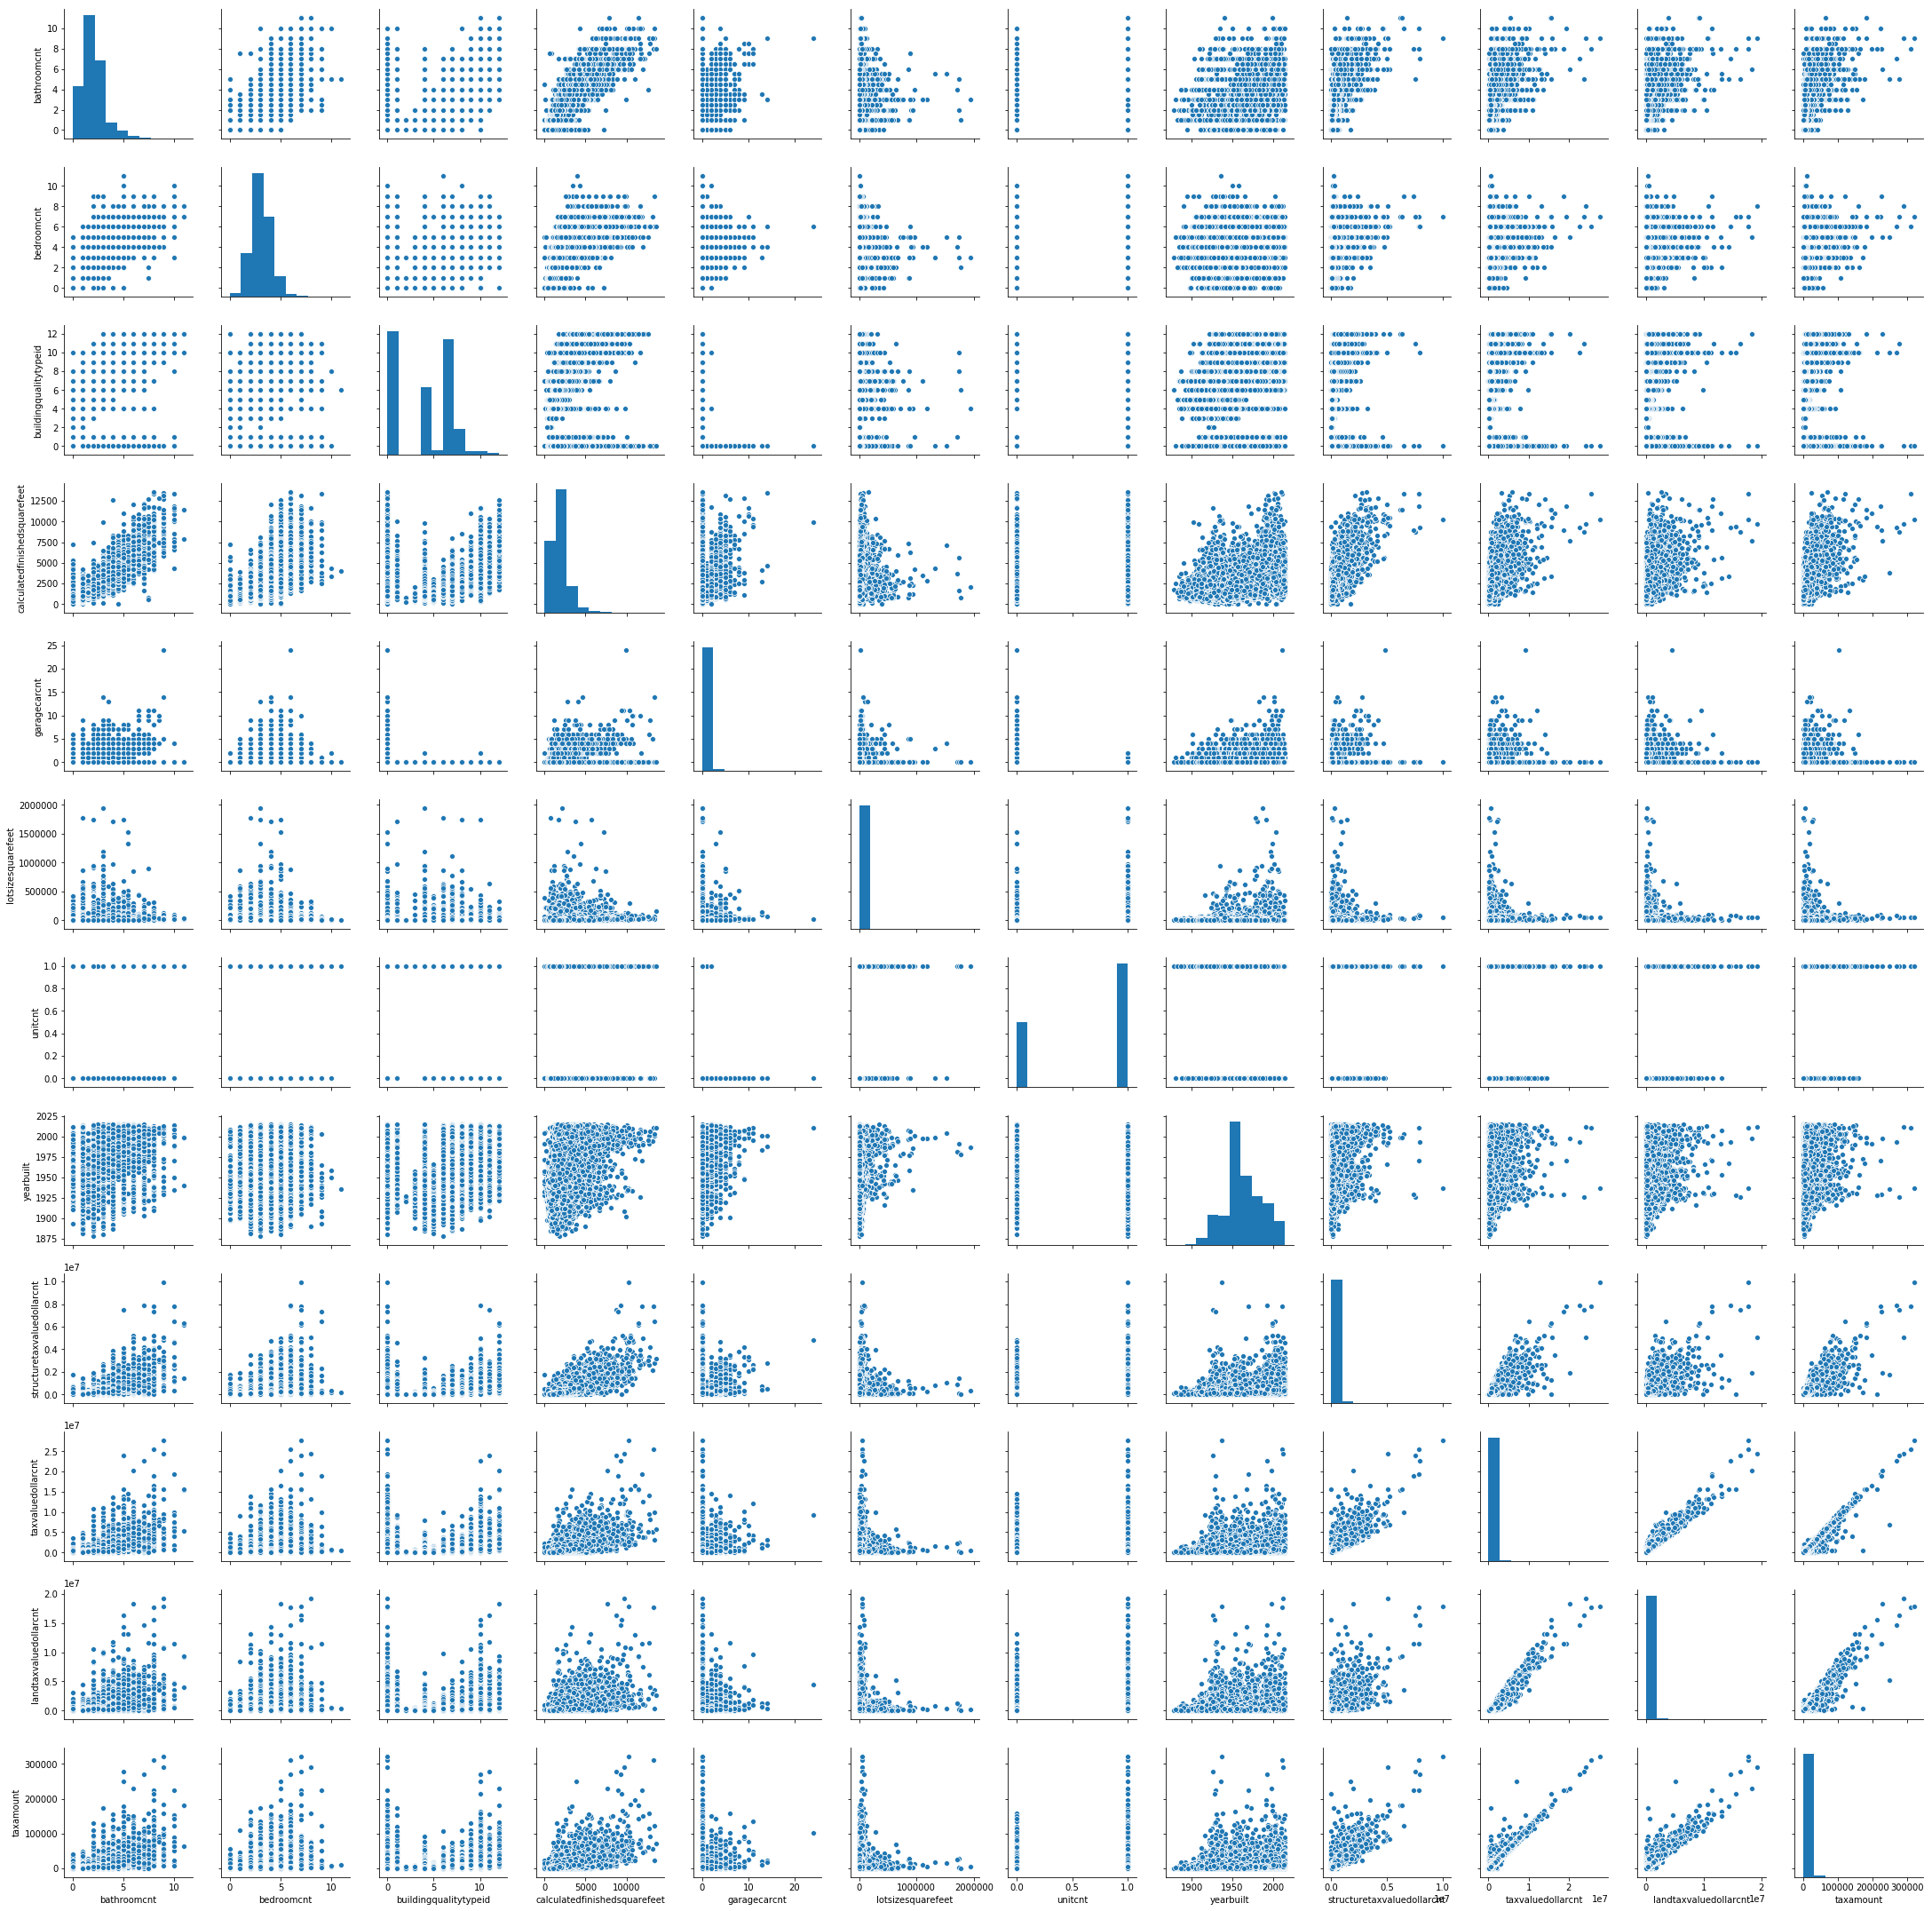

In [504]:
sns.pairplot(df_single_units[x_floats].drop(columns=['latitude','longitude']))
plt.show()

In [505]:
yrbuiltlist = pd.DataFrame(df_single_units.yearbuilt.value_counts())
yrbuiltlist.sort_values(by='yearbuilt',axis=0)

yearbuilt
1,878.00          1
1,891.00          1
1,889.00          1
1,880.00          1
1,882.00          1
1,886.00          1
1,897.00          2
1,887.00          4
1,892.00          4
1,894.00          5
1,888.00          5
1,893.00          6
1,896.00          9
1,899.00          9
1,885.00         10
1,898.00         12
1,900.00         21
1,890.00         22
1,895.00         23
1,902.00         28
1,904.00         37
1,903.00         43
1,901.00         54
1,917.00         86
1,916.00         88
2,015.00         88
1,906.00        103
1,918.00        103
1,905.00        107
1,934.00        108
...             ...
1,990.00       1252
1,979.00       1277
1,969.00       1290
1,968.00       1334
1,978.00       1354
1,972.00       1386
1,973.00       1399
1,987.00       1438
1,976.00       1533
1,977.00       1657
1,958.00       1662
1,989.00       1671
1,961.00       1714
1,960.00       1890
1,949.00       2029
1,962.00       2062
1,965.00       2072
1,948.00       2131
1,957.00       2158
1,963.00       2175
1,959.00       2175
1,947.00       2215
1,952.00       2553
1,951.00       2578
1,964.00       2743
1,956.00       3038
1,953.00       3043
1,954.00       3362
1,950.00       3523
1,955.00       4053

[134 rows x 1 columns]

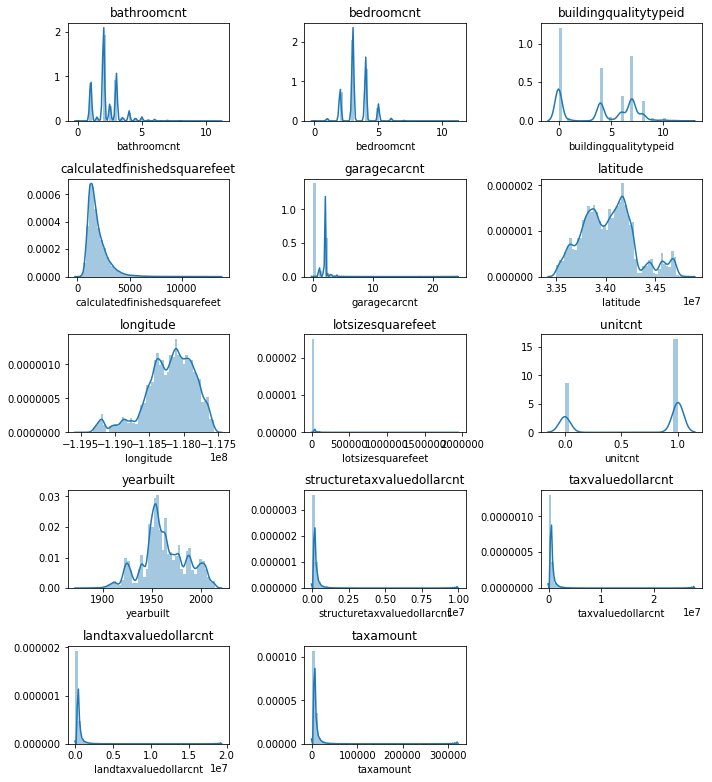

In [506]:
plt.figure(figsize=(10, 30))

for i, col in enumerate(df_single_units[x_floats]):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df_single_units[x_floats][col]
    plt.subplot(14, 3, plot_number)
    plt.title(col)
    plt.tight_layout()
    sns.distplot(series)

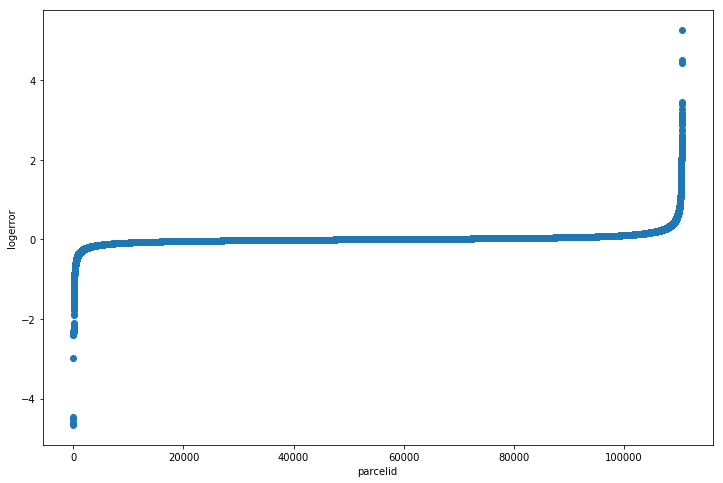

In [507]:
plt.figure(figsize=(12,8))
plt.scatter(range(df_single_units.shape[0]), np.sort(df_single_units.logerror.values))
plt.xlabel('parcelid')
plt.ylabel('logerror')
plt.show()

In [508]:
def show_relplots(df, col1, col2, hue):
    return sns.relplot(x=col1, y=col2, data=df, hue=hue)

In [ ]:
sns.swarmplot(data=df_single_units, x='yearbuilt', y='logerror')

In [ ]:
sns.swarmplot(x="yearbuilt", y='calculatedfinishedsquarefeet', data=df_single_units)
# ax = sns.boxplot(x="yearbuilt_bin", y="calculatedfinishedsquarefeet", data=df_single_units,
#         showcaps=True,boxprops={'facecolor':'None'},
#         showfliers=True,whiskerprops={'linewidth':0})
ax.set(xlabel='Year built', ylabel='Calculated Finished Sq Ft')

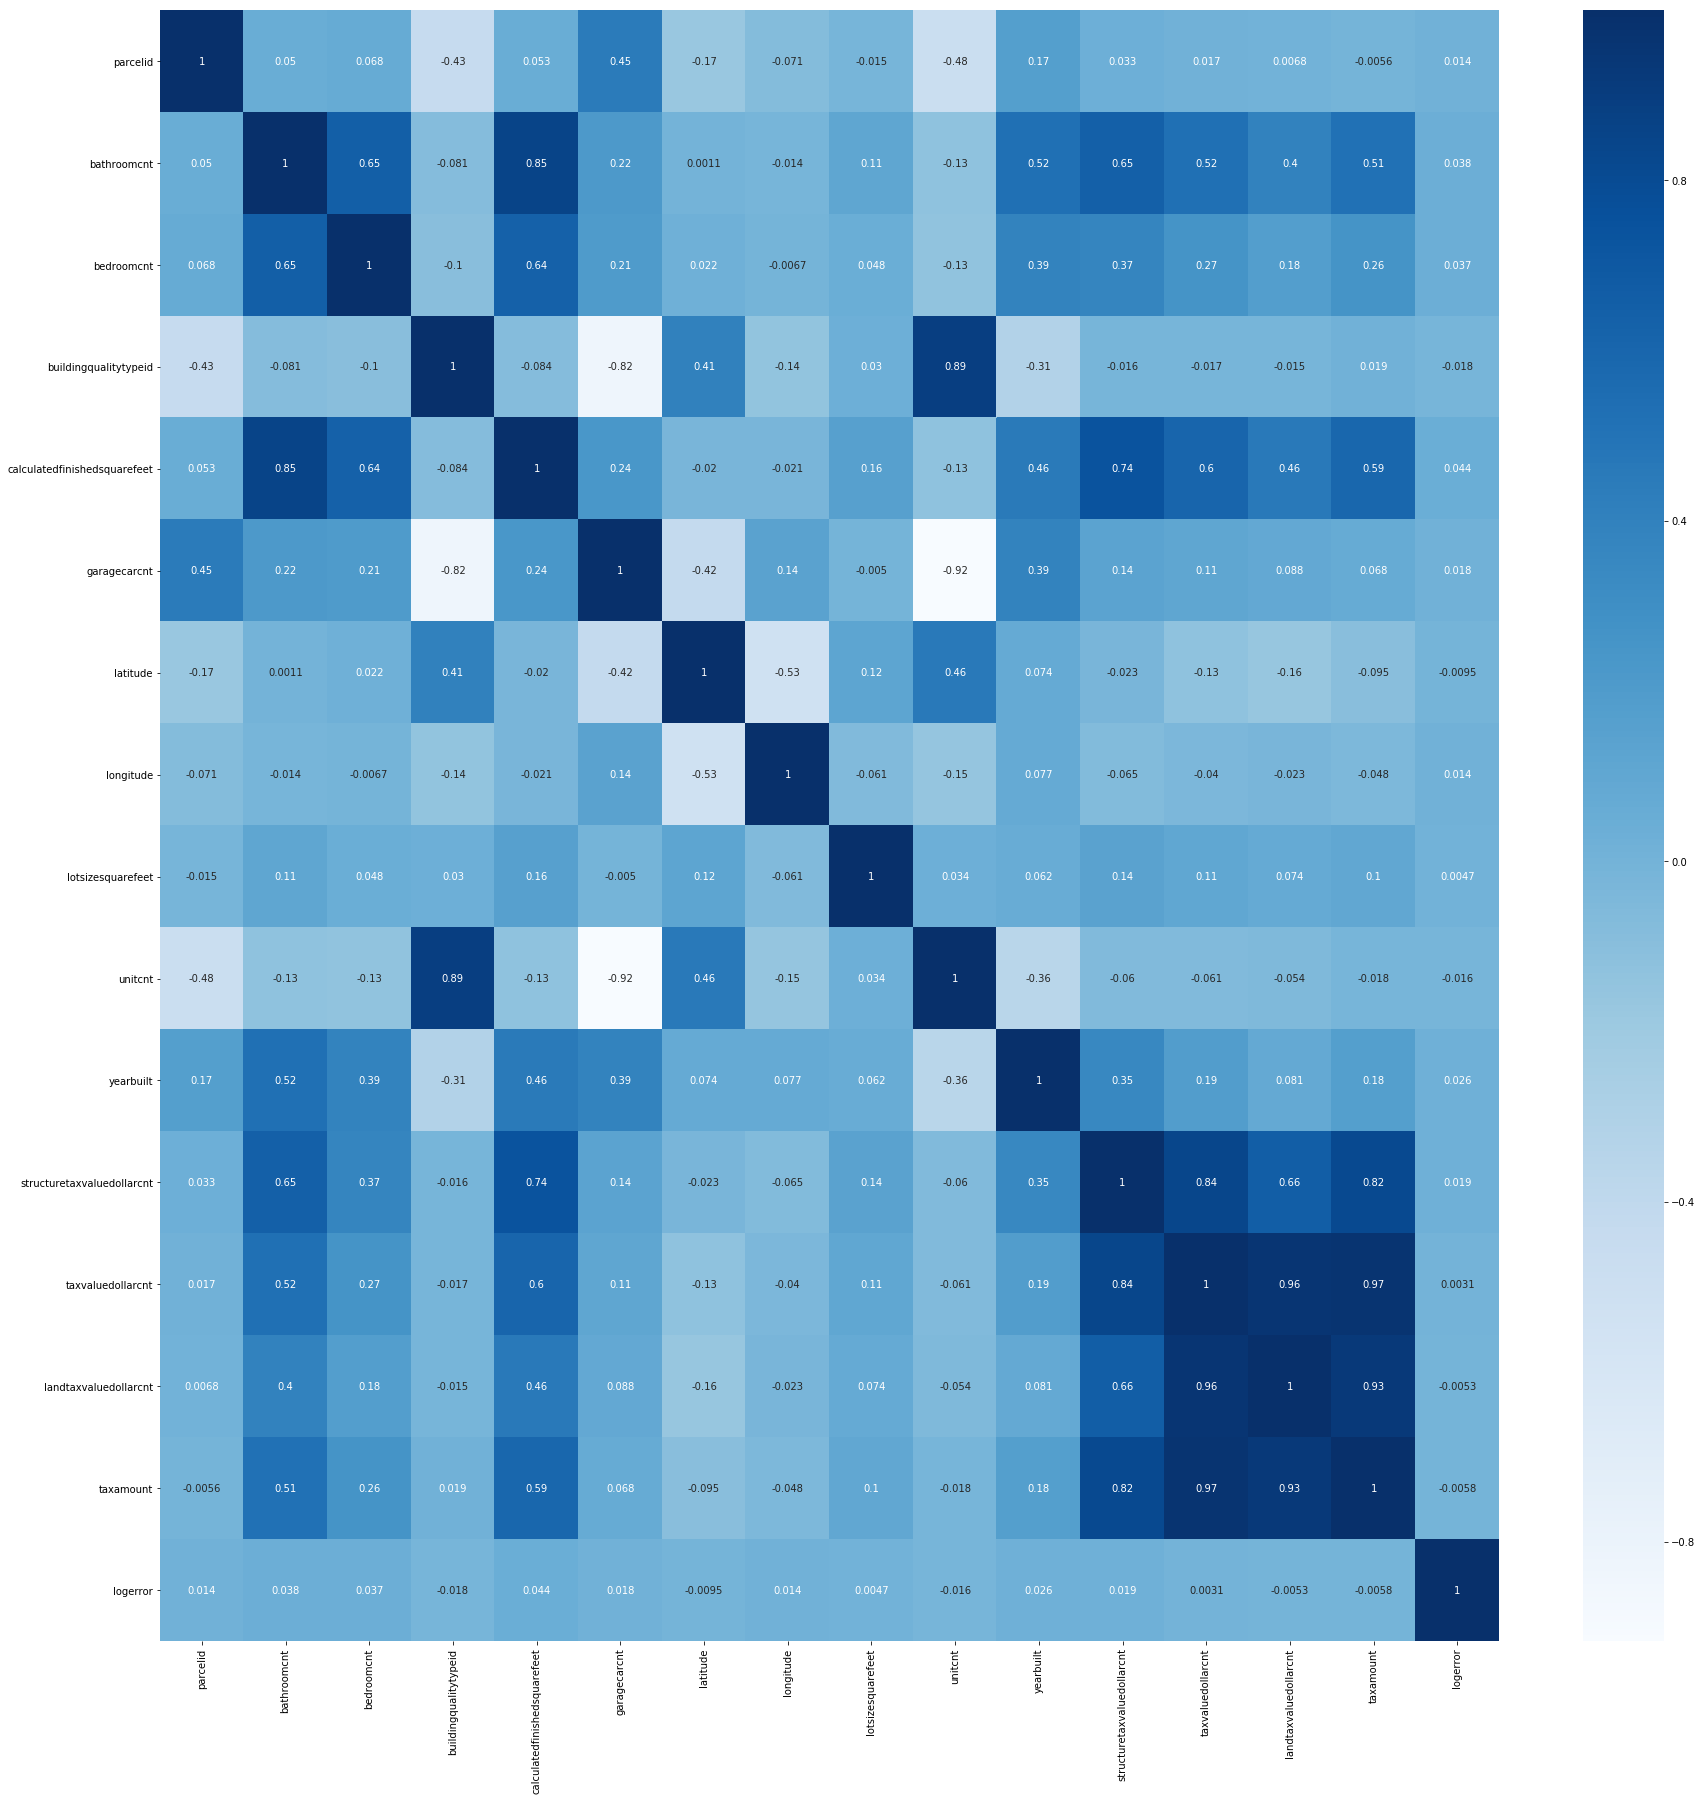

In [453]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_single_units.corr(),cmap='Blues', annot=True)

### Adjusting & Binning data


In [509]:
df['logerror_abs'] = df.logerror.abs()

In [510]:
df_single_units['logerror_abs'] = df_single_units.logerror.abs()

In [511]:
df_multiunits['logerror_abs'] = df_multiunits.logerror.abs()

In [512]:
df_single_units['logerror_bin'] = pd.qcut(df_single_units.logerror_abs, 6, labels=False)

In [513]:
df_single_units['yearbuilt_bin'] = pd.qcut(df_single_units.yearbuilt, 8, labels=False)

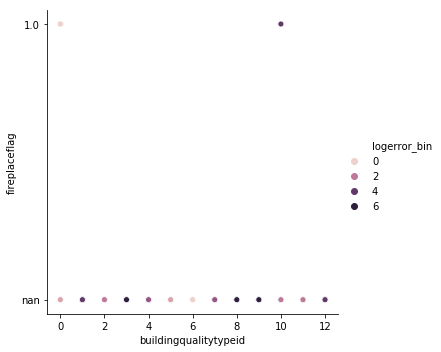

In [515]:
show_relplots(df_single_units, x_floats[2], x_objects[2], hue=df_single_units.logerror_bin)

In [516]:
df_missing_cols_2 = amt_missing(df_single_units)
df_missing_cols_2['Column Name'] = [x for x in df_single_units.columns]
df_missing_cols_2

Percentage Missing  Number of Missing Values  \
0                  0.00                         0   
1                  0.00                         0   
2                  0.00                         0   
3                  0.00                         0   
4                  0.00                         0   
5                  0.00                         0   
6                  0.00                         0   
7                  0.00                         0   
8                  0.00                         0   
9                  0.00                         0   
10                 0.00                         0   
11                 0.00                         0   
12                 0.00                         0   
13                 0.00                         0   
14                 0.00                         0   
15                 0.00                         0   
16                 0.00                         0   
17                 0.00                         0   
18                 0.00                         0   
19                 0.00                         0   
20                 0.00                         0   
21                 0.00                         0   
22                 0.00                         0   
23                 0.00                         0   
24                 0.00                         0   
25                 0.00                         0   
26                 0.00                         0   

                     Column Name  
0                       parcelid  
1                    bathroomcnt  
2                     bedroomcnt  
3          buildingqualitytypeid  
4   calculatedfinishedsquarefeet  
5                   garagecarcnt  
6                       latitude  
7                      longitude  
8              lotsizesquarefeet  
9      propertycountylandusecode  
10                regionidcounty  
11                       unitcnt  
12                     yearbuilt  
13                 fireplaceflag  
14    structuretaxvaluedollarcnt  
15             taxvaluedollarcnt  
16                assessmentyear  
17         landtaxvaluedollarcnt  
18                     taxamount  
19           airconditioningdesc  
20           heatingorsystemdesc  
21           propertylandusedesc  
22                      logerror  
23               transactiondate  
24                  logerror_abs  
25                  logerror_bin  
26                 yearbuilt_bin

In [518]:
def input_zeros(df, cols):
    for col in cols:
        df[col].fillna(0, inplace=True)
    return df
    
input_zeros(df_single_units, ['yearbuilt','yearbuilt_bin'])

parcelid          bathroomcnt           bedroomcnt  \
0      11016594                 2.00                 3.00   
1      14366692                 3.50                 4.00   
2      12098116                 3.00                 2.00   
5      11509835                 4.00                 4.00   
6      12286022                 1.00                 2.00   
10     10854446                 2.00                 2.00   
11     11672170                 4.00                 5.00   
12     10949761                 2.00                 3.00   
14     14148540                 2.00                 2.00   
15     14057104                 2.00                 3.00   
18     14091502                 2.00                 3.00   
19     10815909                 3.00                 3.00   
20     12453853                 1.00                 2.00   
21     14253461                 2.00                 2.00   
22     14001034                 2.00                 4.00   
23     11458863                 4.00                 3.00   
24     13957980                 2.50                 2.00   
25     12752047                 4.00                 3.00   
26     11188425                 2.00                 2.00   
30     11104966                 2.00                 4.00   
32     12440314                 2.00                 3.00   
33     12037577                 2.00                 3.00   
34     11024002                 3.00                 3.00   
35     10777209                 1.00                 3.00   
36     14022628                 2.00                 4.00   
37     14195954                 2.00                 4.00   
38     12339438                 1.00                 2.00   
39     14022972                 2.00                 3.00   
40     11921507                 3.00                 3.00   
41     14055759                 2.00                 4.00   
...         ...                  ...                  ...   
77569  13101116                 3.00                 4.00   
77571  12900430                 1.00                 3.00   
77574  12902546                 2.00                 4.00   
77576  13093347                 2.00                 4.00   
77577  12652149                 1.00                 2.00   
77578  10957570                 1.00                 2.00   
77579  13090750                 2.00                 3.00   
77580  10867042                 2.00                 3.00   
77581  13089085                 3.00                 4.00   
77583  12651460                 1.00                 2.00   
77584  10962691                 2.00                 3.00   
77586  12433997                 1.00                 2.00   
77587  10855745                 3.00                 3.00   
77588  12883894                 1.00                 3.00   
77589  12885530                 1.00                 2.00   
77591  12401161                 3.00                 3.00   
77594  12406123                 2.00                 2.00   
77595  12669704                 2.00                 4.00   
77596  12410050                 1.00                 2.00   
77598  11608641                 2.00                 2.00   
77599  11978003                 2.00                 3.00   
77600  11318911                 1.00                 1.00   
77602  12055795                 1.00                 2.00   
77603  12892446                 3.00                 4.00   
77606  10722691                 2.00                 3.00   
77607  12412492                 2.00                 4.00   
77609  11000655                 2.00                 2.00   
77610  17239384                 2.00                 4.00   
77611  12773139                 1.00                 3.00   
77612  12826780                 2.00                 3.00   

       buildingqualitytypeid  calculatedfinishedsquarefeet  \
0                       4.00                      1,684.00   
1                       0.00                      2,263.00   
2                       4.00          

In [519]:
df_missing_cols_3 = amt_missing(df_single_units)
df_missing_cols_3['Column Name'] = [x for x in df_single_units.columns]
df_missing_cols_3

Percentage Missing  Number of Missing Values  \
0                  0.00                         0   
1                  0.00                         0   
2                  0.00                         0   
3                  0.00                         0   
4                  0.00                         0   
5                  0.00                         0   
6                  0.00                         0   
7                  0.00                         0   
8                  0.00                         0   
9                  0.00                         0   
10                 0.00                         0   
11                 0.00                         0   
12                 0.00                         0   
13                 0.00                         0   
14                 0.00                         0   
15                 0.00                         0   
16                 0.00                         0   
17                 0.00                         0   
18                 0.00                         0   
19                 0.00                         0   
20                 0.00                         0   
21                 0.00                         0   
22                 0.00                         0   
23                 0.00                         0   
24                 0.00                         0   
25                 0.00                         0   
26                 0.00                         0   

                     Column Name  
0                       parcelid  
1                    bathroomcnt  
2                     bedroomcnt  
3          buildingqualitytypeid  
4   calculatedfinishedsquarefeet  
5                   garagecarcnt  
6                       latitude  
7                      longitude  
8              lotsizesquarefeet  
9      propertycountylandusecode  
10                regionidcounty  
11                       unitcnt  
12                     yearbuilt  
13                 fireplaceflag  
14    structuretaxvaluedollarcnt  
15             taxvaluedollarcnt  
16                assessmentyear  
17         landtaxvaluedollarcnt  
18                     taxamount  
19           airconditioningdesc  
20           heatingorsystemdesc  
21           propertylandusedesc  
22                      logerror  
23               transactiondate  
24                  logerror_abs  
25                  logerror_bin  
26                 yearbuilt_bin

### Chi-squared Test

In [520]:
df_single_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110601 entries, 0 to 77612
Data columns (total 27 columns):
parcelid                        110601 non-null int64
bathroomcnt                     110601 non-null float64
bedroomcnt                      110601 non-null float64
buildingqualitytypeid           110601 non-null float64
calculatedfinishedsquarefeet    110601 non-null float64
garagecarcnt                    110601 non-null float64
latitude                        110601 non-null float64
longitude                       110601 non-null float64
lotsizesquarefeet               110601 non-null float64
propertycountylandusecode       110601 non-null object
regionidcounty                  110601 non-null object
unitcnt                         110601 non-null float64
yearbuilt                       110601 non-null float64
fireplaceflag                   110601 non-null object
structuretaxvaluedollarcnt      110601 non-null float64
taxvaluedollarcnt               110601 non-null float64

In [521]:
### taxdelinquency year shows null values when put into a crosstab table

In [522]:
tbl_1 = pd.crosstab(df_single_units['logerror_bin'], df_single_units['yearbuilt_bin'], margins=True)
tbl_1

yearbuilt_bin      0      1      2      3      4      5      6      7     All
logerror_bin                                                                 
0               1609   2136   2454   1806   2351   2772   2789   2757   18674
1               1695   2135   2554   1700   2243   2578   2628   2660   18193
2               1977   2351   2603   1888   2214   2491   2445   2465   18434
3               2351   2549   2709   1915   2189   2343   2277   2168   18501
4               2962   2832   2609   1817   2035   2083   2115   1912   18365
5               4098   3177   2660   1797   1808   1608   1770   1516   18434
All            14692  15180  15589  10923  12840  13875  14024  13478  110601

In [523]:
stat, p, dof, expected = stats.chi2_contingency(tbl_1)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)


Dependent (reject H0)
0.0


#### Null hyp: There is no signicant difference between the logerror (bins) and year built (bins).

#### Reject null hyp. Therefore, the  logerror (bins) and year built (bins) are different.

### T test

In [524]:
stats.ttest_ind(df_single_units.logerror_abs, df_multiunits.logerror_abs)

Ttest_indResult(statistic=18.594142277918852, pvalue=4.33912009717048e-77)

## The t-test shows that the difference of logerror between single family homes and all the rest of units in the sample are different. 
## So the type of home (whether single family or not) seems to play a part in the logerror.

In [525]:
df_single_units[x_floats].head()

bathroomcnt           bedroomcnt  buildingqualitytypeid  \
0                 2.00                 3.00                   4.00   
1                 3.50                 4.00                   0.00   
2                 3.00                 2.00                   4.00   
5                 4.00                 4.00                   1.00   
6                 1.00                 2.00                   7.00   

   calculatedfinishedsquarefeet         garagecarcnt             latitude  \
0                      1,684.00                 0.00        34,280,990.00   
1                      2,263.00                 2.00        33,668,120.00   
2                      2,217.00                 0.00        34,136,312.00   
5                      3,067.00                 0.00        33,870,089.00   
6                      1,297.00                 0.00        33,899,475.00   

             longitude    lotsizesquarefeet              unitcnt  \
0      -118,488,536.00             7,528.00                 1.00   
1      -117,677,556.00             3,643.00                 0.00   
2      -118,175,032.00            11,423.00                 1.00   
5      -118,402,768.00             2,708.00                 1.00   
6      -118,212,720.00             6,677.00                 1.00   

             yearbuilt  structuretaxvaluedollarcnt    taxvaluedollarcnt  \
0             1,959.00                  122,754.00           360,170.00   
1             2,014.00                  346,458.00           585,529.00   
2             1,940.00                   61,994.00           119,906.00   
5             1,982.00                  880,650.00         2,447,951.00   
6             1,939.00                   64,549.00           111,521.00   

   landtaxvaluedollarcnt            taxamount  
0             237,416.00             6,735.88  
1             239,071.00            10,153.02  
2              57,912.00            11,484.48  
5           1,567,301.00            27,126.57  
6              46,972.00             2,304.97

In [526]:
df_single_units[x_objects].head()

propertycountylandusecode regionidcounty fireplaceflag assessmentyear  \
0                      0100         3101.0           nan         2015.0   
1                         1         1286.0           nan         2015.0   
2                      0100         3101.0           nan         2015.0   
5                      0100         3101.0           nan         2015.0   
6                      0100         3101.0           nan         2015.0   

  airconditioningdesc heatingorsystemdesc        propertylandusedesc  \
0             Central             Central  Single Family Residential   
1                   0                   0  Single Family Residential   
2             Central             Central  Single Family Residential   
5             Central             Central  Single Family Residential   
6                   0          Floor/Wall  Single Family Residential   

  transactiondate  
0      2016-01-01  
1      2016-01-01  
2      2016-01-01  
5      2016-01-02  
6      2016-01-02

# Clustering

### Clustering the target variable: logerror

     k                  sse
0    1             3,084.85
1    2             1,998.49
2    3             1,494.71
3    4             1,011.92
4    5               755.39
5    6               564.44
6    7               424.71
7    8               331.38
8    9               269.72
9   10               226.60
10  11               195.54
11  12               169.20
12  13               145.35
13  14               122.90


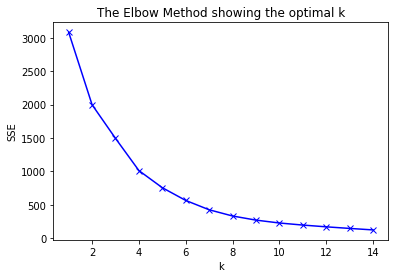

In [527]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_single_units[['logerror']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [528]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_single_units[['logerror']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<Figure size 1440x1440 with 0 Axes>

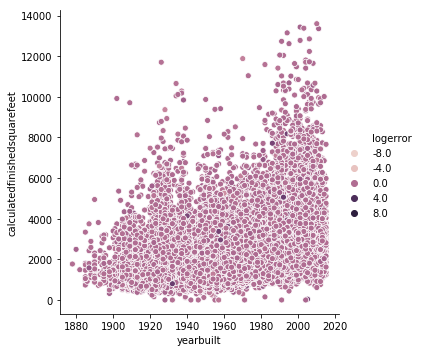

In [529]:
df_single_units['cluster_target'] = kmeans.predict(df_single_units[['logerror']])
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')

<Figure size 1440x1440 with 0 Axes>

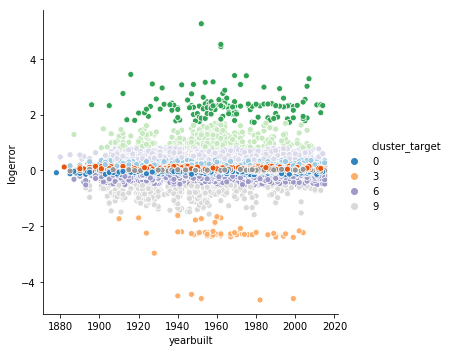

In [530]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='yearbuilt', y='logerror', hue='cluster_target', palette='tab20c')

### Centroids of clustering with logerror only

In [531]:
(kmeans.cluster_centers_)

array([[-7.30954190e-02],
       [ 2.27729031e-01],
       [ 7.18321543e-02],
       [-2.39670521e+00],
       [ 2.34812977e+00],
       [ 1.09033929e+00],
       [-2.62720072e-01],
       [ 5.25767185e-01],
       [ 2.15521054e-03],
       [-7.92734379e-01]])

In [532]:
df_single_units.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty',
       'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc', 'logerror', 'transactiondate', 'logerror_abs',
       'logerror_bin', 'yearbuilt_bin', 'cluster_target'],
      dtype='object')

#### These tell us that the clusters are distributed along one axis.

<Figure size 1440x1440 with 0 Axes>

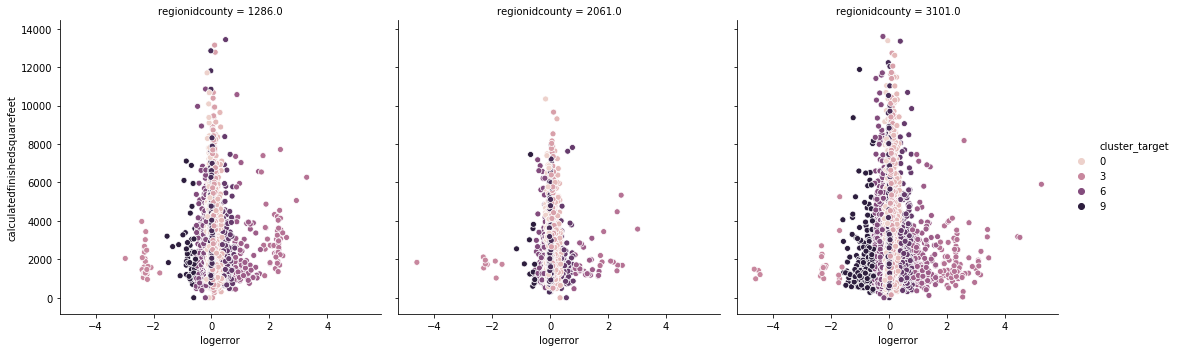

In [533]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='logerror', y='calculatedfinishedsquarefeet', hue='cluster_target', col='regionidcounty')

### This plot shows that there are more larger sized homes in the county 3101. This also shows that there are greater range of logerrors in this same county. This could lead us to believe that the size of the homes are contributing to logerror in this specific county. 
### Or this can simply mean that the homes in this county are more susceptible to logerrors. On the right of the county 3101 plot, there is a cluster of small sized homes with a high logerror. Maybe this custer captures the homes that were 'flipped' for profit.

## Evaluate the clustering

In [709]:
tbl_clust1 = pd.crosstab(df_single_units['cluster_target'], df_single_units['logerror_bin'], margins=True)
tbl_clust1

logerror_bin        0      1      2      3      4      5     All
cluster_target                                                  
0                   0      0      0   7067   8000   3816   18883
1                   0      0      0      0      0   5074    5074
2                   0      0      0   7807  10365   4187   22359
3                   0      0      0      0      0     59      59
4                   0      0      0      0      0    145     145
5                   0      0      0      0      0    343     343
6                   0      0      0      0      0   3030    3030
7                   0      0      0      0      0   1343    1343
8               18674  18193  18434   3627      0      0   58928
9                   0      0      0      0      0    437     437
All             18674  18193  18434  18501  18365  18434  110601

In [710]:
stat, p, dof, expected = stats.chi2_contingency(tbl_clust1)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)


Dependent (reject H0)
0.0


In [711]:
stats.chi2_contingency(tbl_clust1)

(147898.27871978498,
 0.0,
 60,
 array([[3.18822743e+03, 3.10610590e+03, 3.14725203e+03, 3.15869100e+03,
         3.13547161e+03, 3.14725203e+03, 1.88830000e+04],
        [8.56699994e+02, 8.34633340e+02, 8.45689605e+02, 8.48763338e+02,
         8.42524118e+02, 8.45689605e+02, 5.07400000e+03],
        [3.77511927e+03, 3.67788073e+03, 3.72660108e+03, 3.74014574e+03,
         3.71265210e+03, 3.72660108e+03, 2.23590000e+04],
        [9.96162783e+00, 9.70503883e+00, 9.83360006e+00, 9.86934115e+00,
         9.79679207e+00, 9.83360006e+00, 5.90000000e+01],
        [2.44819667e+01, 2.38513666e+01, 2.41673222e+01, 2.42551604e+01,
         2.40768619e+01, 2.41673222e+01, 1.45000000e+02],
        [5.79125144e+01, 5.64208190e+01, 5.71682173e+01, 5.73760002e+01,
         5.69542319e+01, 5.71682173e+01, 3.43000000e+02],
        [5.11588684e+02, 4.98411316e+02, 5.05013698e+02, 5.06849215e+02,
         5.03123389e+02, 5.05013698e+02, 3.03000000e+03],
        [2.26753664e+02, 2.20913003e+02, 2.23839405

## Clustering Independent Variables

### Location

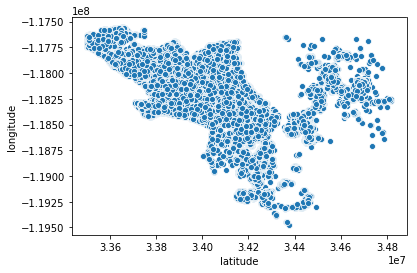

In [534]:
df_lat_and_long = df_single_units[['latitude','longitude']]
sns.scatterplot(data=df_lat_and_long, x='latitude', y='longitude',)
plt.show()

In [535]:
df_lat_and_long.head()

latitude            longitude
0        34,280,990.00      -118,488,536.00
1        33,668,120.00      -117,677,556.00
2        34,136,312.00      -118,175,032.00
5        33,870,089.00      -118,402,768.00
6        33,899,475.00      -118,212,720.00

     k                       sse
0    1 21,431,853,363,091,604.00
1    2 10,218,153,541,533,656.00
2    3  7,115,758,764,614,870.00
3    4  4,903,119,751,810,014.00
4    5  3,568,136,919,828,077.50
5    6  2,677,572,943,312,410.00
6    7  2,211,637,320,955,316.25
7    8  1,827,458,492,548,583.75
8    9  1,600,187,560,407,508.25
9   10  1,379,589,833,830,423.00
10  11  1,193,007,200,333,254.00
11  12  1,084,042,483,183,518.38
12  13    977,081,603,848,189.00
13  14    896,655,027,406,249.12


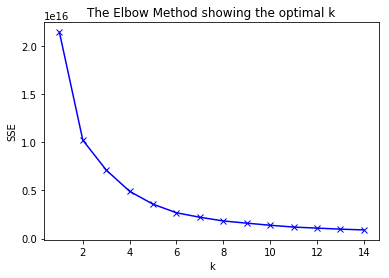

In [536]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_lat_and_long)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [537]:
kmeans2 = KMeans(n_clusters=8)
kmeans2.fit(df_lat_and_long)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [538]:
kmeans2.predict(df_lat_and_long)

array([6, 2, 1, ..., 6, 7, 7], dtype=int32)

In [539]:
df_lat_and_long.head()

latitude            longitude
0        34,280,990.00      -118,488,536.00
1        33,668,120.00      -117,677,556.00
2        34,136,312.00      -118,175,032.00
5        33,870,089.00      -118,402,768.00
6        33,899,475.00      -118,212,720.00

In [540]:
df_lat_and_long['cluster_target'] = kmeans2.predict(df_lat_and_long)
# df_lat_and_long.cluster_target = 'cluster_' + (df_single_units.cluster_target + 1).astype('str')
# df_lat_and_long.head()


In [629]:
centers = pd.DataFrame(kmeans2.cluster_centers_,columns=['latitude','longitude'])
centers.head()

latitude            longitude
0        33,869,156.64      -118,232,535.55
1        34,107,708.25      -118,330,225.01
2        33,612,048.79      -117,701,663.18
3        34,240,131.68      -119,045,209.52
4        34,626,750.98      -118,125,825.86

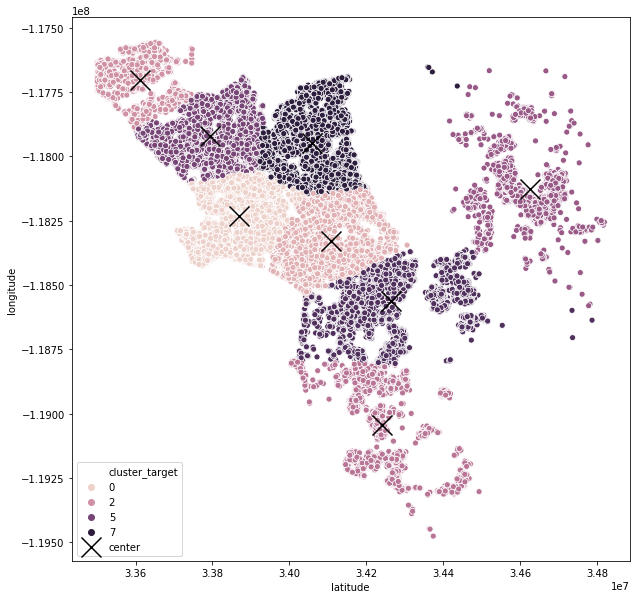

In [630]:
plt.figure(figsize=(10,10))
# sns.relplot(data=df_lat_and_long, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')
sns.scatterplot(data=df_lat_and_long, x='latitude', y='longitude',hue='cluster_target')
plt.scatter(centers.latitude, centers.longitude, s=400, marker='x', c='black', label='center')
plt.legend()
plt.show()

In [542]:
df_single_units['clusters_lat_and_long'] = df_lat_and_long['cluster_target']

## Evaluate the clustering

In [712]:
tbl_clust2 = pd.crosstab(df_single_units['clusters_lat_and_long'], df_single_units['logerror_bin'], margins=True)
tbl_clust2

logerror_bin               0      1      2      3      4      5     All
clusters_lat_and_long                                                  
0                       2763   2750   2933   3027   2885   3203   17561
1                       1986   2123   2482   3162   4076   4914   18743
2                       1984   1838   1643   1494   1311   1060    9330
3                       1411   1378   1279   1197   1158    978    7401
4                       1349   1317   1295   1165   1152   1240    7518
5                       3896   3564   3534   3276   2775   2513   19558
6                       2686   2626   2674   2473   2326   2102   14887
7                       2599   2597   2594   2707   2682   2424   15603
All                    18674  18193  18434  18501  18365  18434  110601

In [713]:
stat, p, dof, expected = stats.chi2_contingency(tbl_clust2)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)


Dependent (reject H0)
0.0


In [711]:
stats.chi2_contingency(tbl_clust1)

(147898.27871978498,
 0.0,
 60,
 array([[3.18822743e+03, 3.10610590e+03, 3.14725203e+03, 3.15869100e+03,
         3.13547161e+03, 3.14725203e+03, 1.88830000e+04],
        [8.56699994e+02, 8.34633340e+02, 8.45689605e+02, 8.48763338e+02,
         8.42524118e+02, 8.45689605e+02, 5.07400000e+03],
        [3.77511927e+03, 3.67788073e+03, 3.72660108e+03, 3.74014574e+03,
         3.71265210e+03, 3.72660108e+03, 2.23590000e+04],
        [9.96162783e+00, 9.70503883e+00, 9.83360006e+00, 9.86934115e+00,
         9.79679207e+00, 9.83360006e+00, 5.90000000e+01],
        [2.44819667e+01, 2.38513666e+01, 2.41673222e+01, 2.42551604e+01,
         2.40768619e+01, 2.41673222e+01, 1.45000000e+02],
        [5.79125144e+01, 5.64208190e+01, 5.71682173e+01, 5.73760002e+01,
         5.69542319e+01, 5.71682173e+01, 3.43000000e+02],
        [5.11588684e+02, 4.98411316e+02, 5.05013698e+02, 5.06849215e+02,
         5.03123389e+02, 5.05013698e+02, 3.03000000e+03],
        [2.26753664e+02, 2.20913003e+02, 2.23839405

In [544]:
stats.ttest_ind(df_single_units.logerror_abs, df_single_units.clusters_lat_and_long)

Ttest_indResult(statistic=-456.068543817649, pvalue=0.0)

<Figure size 1440x1440 with 0 Axes>

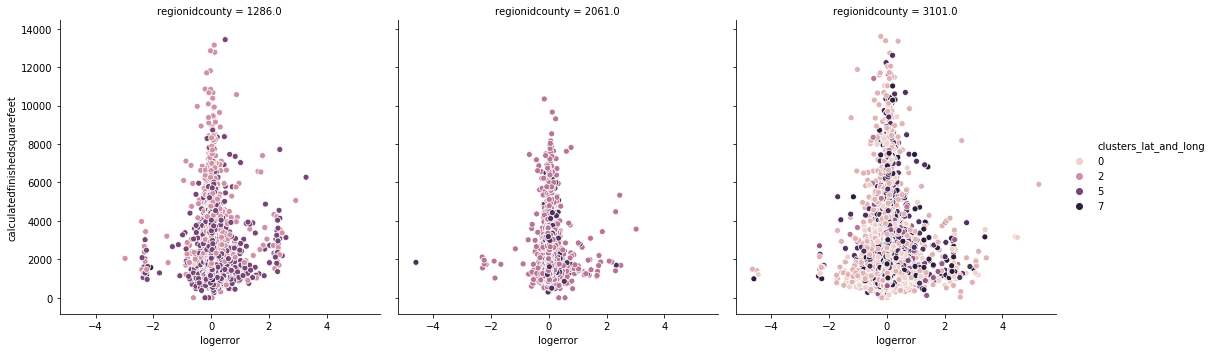

In [546]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='logerror', y='calculatedfinishedsquarefeet', hue='clusters_lat_and_long', col='regionidcounty')

# Clustering
## Size

In [547]:
df_single_units.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty',
       'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc', 'logerror', 'transactiondate', 'logerror_abs',
       'logerror_bin', 'yearbuilt_bin', 'cluster_target',
       'clusters_lat_and_long'],
      dtype='object')

In [548]:
df_home_size = df_single_units[['calculatedfinishedsquarefeet']]

In [549]:
df_home_size.head()

calculatedfinishedsquarefeet
0                      1,684.00
1                      2,263.00
2                      2,217.00
5                      3,067.00
6                      1,297.00

     k                  sse
0    1   103,657,468,592.04
1    2    41,957,798,909.99
2    3    23,285,931,226.35
3    4    14,498,901,574.92
4    5     9,924,370,486.97
5    6     7,232,388,141.61
6    7     5,477,050,930.55
7    8     4,281,512,805.77
8    9     3,472,745,958.13
9   10     2,861,837,703.50
10  11     2,356,923,626.16
11  12     1,983,253,211.58
12  13     1,693,570,881.02
13  14     1,464,124,456.86


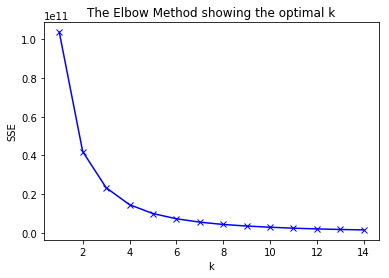

In [550]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_home_size)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [551]:
kmeans3 = KMeans(n_clusters=8)
kmeans3.fit(df_home_size)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [552]:
kmeans3.predict(df_home_size)

array([3, 2, 2, ..., 0, 6, 3], dtype=int32)

In [553]:
df_home_size['cluster_target'] = kmeans3.predict(df_home_size)

In [554]:
df_single_units['clusters_home_size'] = df_home_size['cluster_target']

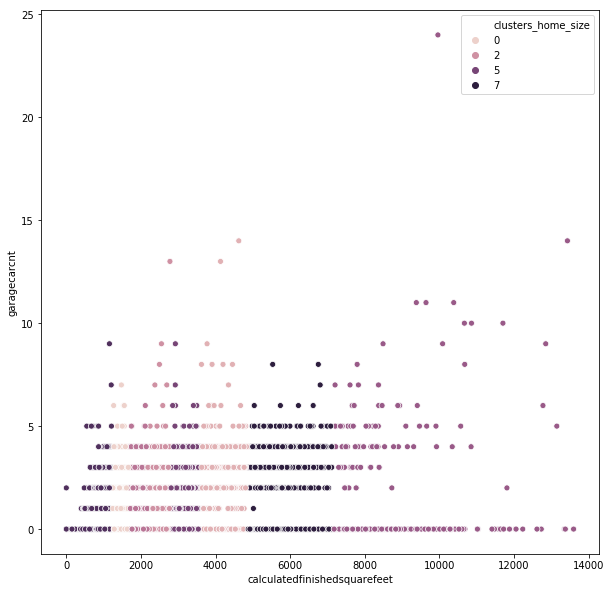

In [555]:
plt.figure(figsize=(10,10))
# sns.relplot(data=df_lat_and_long, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')
sns.scatterplot(data=df_single_units, x='calculatedfinishedsquarefeet', y='garagecarcnt',hue='clusters_home_size')
plt.legend()
plt.show()

<Figure size 1440x1440 with 0 Axes>

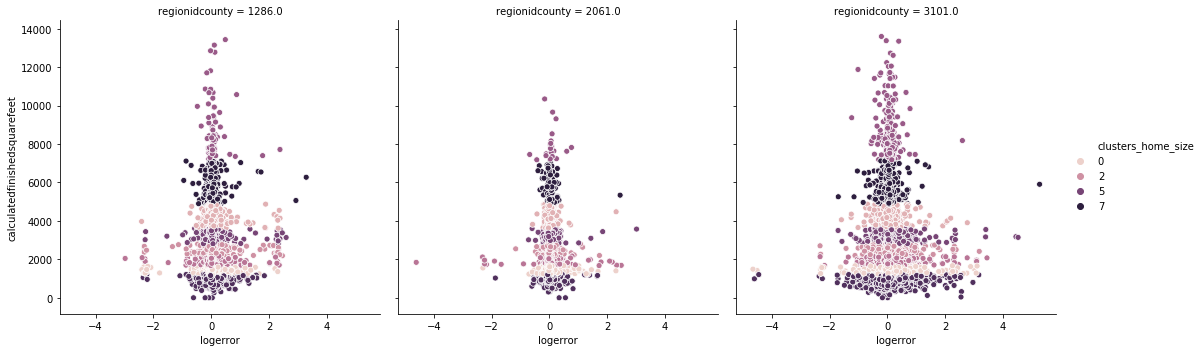

In [556]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='logerror', y='calculatedfinishedsquarefeet', hue='clusters_home_size', col='regionidcounty')

# Clustering
## Size and Location

In [557]:
df_single_units.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty',
       'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc', 'logerror', 'transactiondate', 'logerror_abs',
       'logerror_bin', 'yearbuilt_bin', 'cluster_target',
       'clusters_lat_and_long', 'clusters_home_size'],
      dtype='object')

In [558]:
df_home_size_loc = df_single_units[['calculatedfinishedsquarefeet','lotsizesquarefeet', 'latitude','longitude']]

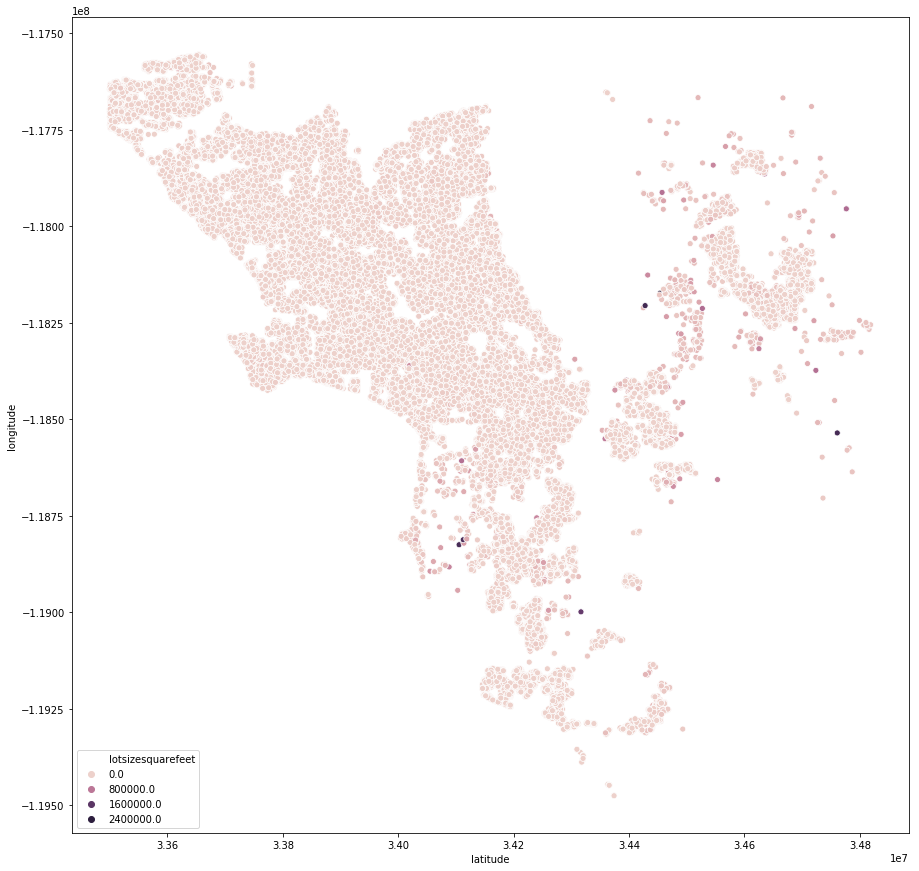

In [559]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_single_units, x='latitude', y='longitude',hue='lotsizesquarefeet')
plt.show()

In [560]:
df_home_size_loc.head()

calculatedfinishedsquarefeet    lotsizesquarefeet             latitude  \
0                      1,684.00             7,528.00        34,280,990.00   
1                      2,263.00             3,643.00        33,668,120.00   
2                      2,217.00            11,423.00        34,136,312.00   
5                      3,067.00             2,708.00        33,870,089.00   
6                      1,297.00             6,677.00        33,899,475.00   

             longitude  
0      -118,488,536.00  
1      -117,677,556.00  
2      -118,175,032.00  
5      -118,402,768.00  
6      -118,212,720.00

     k                       sse
0    1 21,509,974,992,718,940.00
1    2 10,295,495,882,120,490.00
2    3  7,193,236,249,974,459.00
3    4  4,979,742,026,834,694.00
4    5  3,644,600,603,174,357.00
5    6  2,754,218,326,013,938.00
6    7  2,288,159,042,800,602.50
7    8  1,904,024,530,498,414.00
8    9  1,676,672,395,274,363.00
9   10  1,455,931,891,114,194.00
10  11  1,269,390,528,740,796.75
11  12  1,160,445,549,373,675.00
12  13  1,053,417,140,968,642.00
13  14    973,020,532,652,146.88


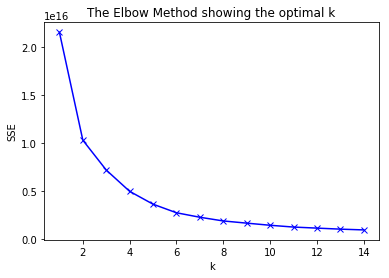

In [561]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_home_size_loc)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [562]:
kmeans4 = KMeans(n_clusters=8)
kmeans4.fit(df_home_size_loc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [563]:
kmeans4.predict(df_home_size_loc)

array([6, 4, 2, ..., 6, 5, 5], dtype=int32)

In [564]:
df_home_size_loc['cluster_target'] = kmeans4.predict(df_home_size_loc)


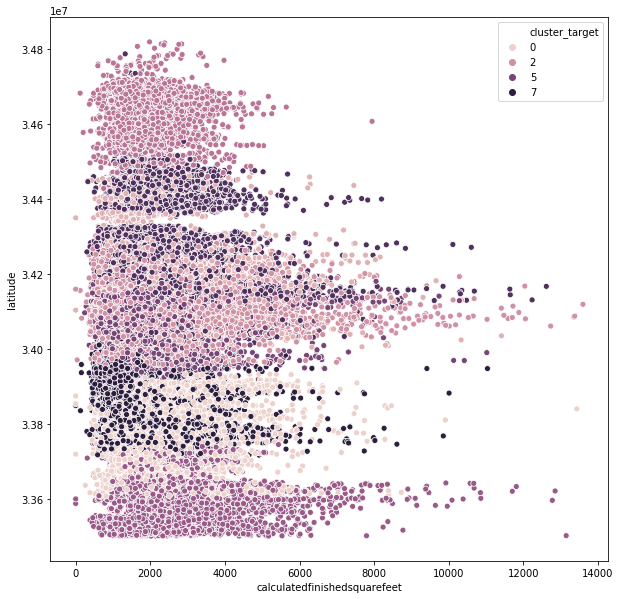

In [565]:
plt.figure(figsize=(10,10))
# sns.relplot(data=df_lat_and_long, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')
sns.scatterplot(data=df_home_size_loc, x='calculatedfinishedsquarefeet', y='latitude',hue='cluster_target')
plt.legend()
plt.show()

In [566]:
df_single_units['clusters_home_size_loc'] = df_home_size_loc['cluster_target']

<Figure size 1440x1440 with 0 Axes>

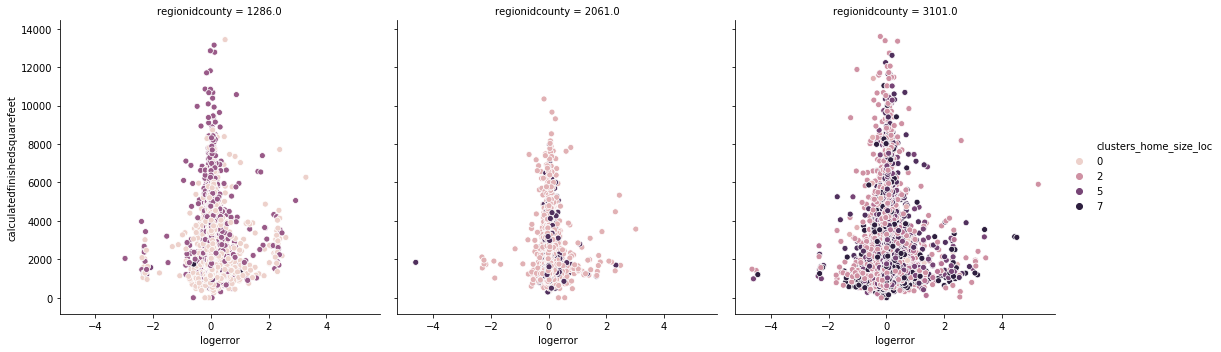

In [567]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='logerror', y='calculatedfinishedsquarefeet', hue='clusters_home_size_loc', col='regionidcounty')

# Clustering
## Year Built

In [568]:
df_yr = df_single_units[['yearbuilt']]

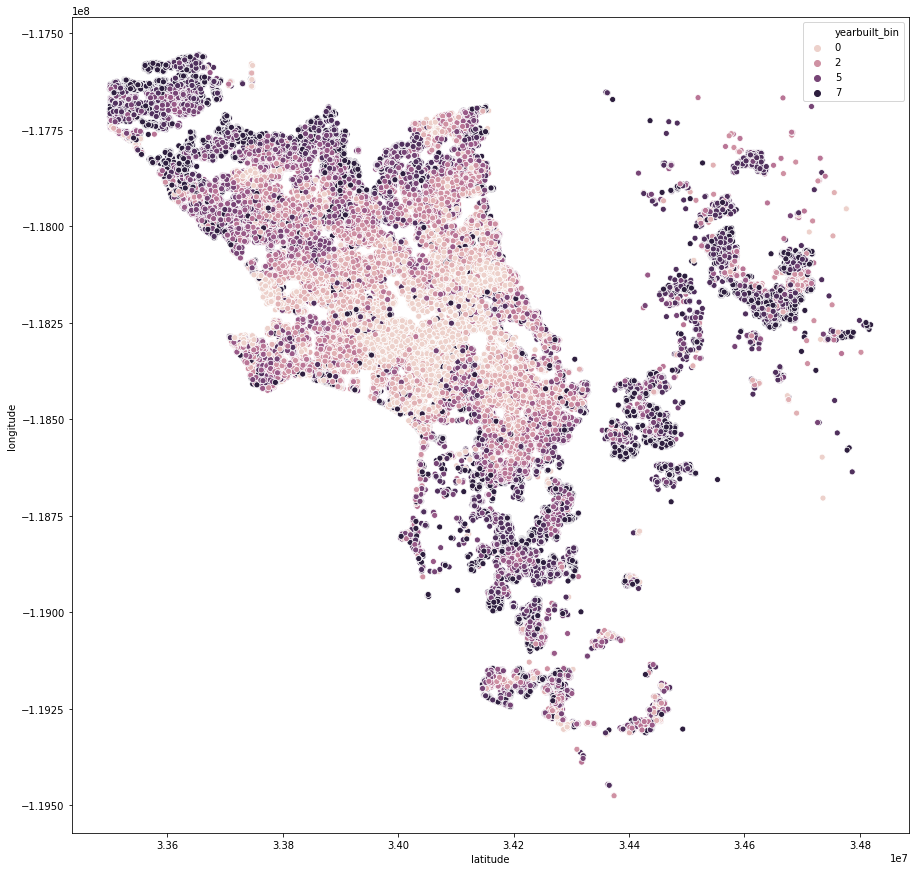

In [569]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_single_units, x='latitude', y='longitude',hue='yearbuilt_bin')
plt.show()

     k                  sse
0    1        58,447,158.97
1    2        20,146,702.82
2    3         9,099,157.28
3    4         5,078,116.36
4    5         3,407,411.14
5    6         2,455,719.43
6    7         1,756,189.61
7    8         1,306,077.66
8    9         1,024,185.62
9   10           820,133.39
10  11           662,023.10
11  12           596,808.65
12  13           528,920.92
13  14           458,628.72


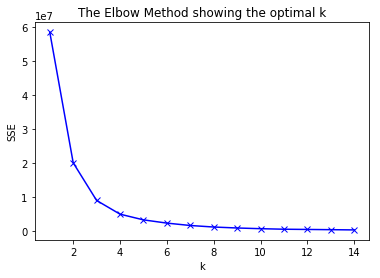

In [570]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_yr)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [585]:
kmeans5 = KMeans(n_clusters=4)
kmeans5.fit(df_yr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [586]:
kmeans5.predict(df_yr)

array([0, 1, 0, ..., 3, 0, 0], dtype=int32)

In [587]:
df_yr['cluster_target'] = kmeans5.predict(df_yr)

In [588]:
df_yr.head()

yearbuilt  cluster_target
0             1,959.00               0
1             2,014.00               1
2             1,940.00               0
5             1,982.00               3
6             1,939.00               0

In [589]:
df_single_units['clusters_yr'] = df_yr['cluster_target']

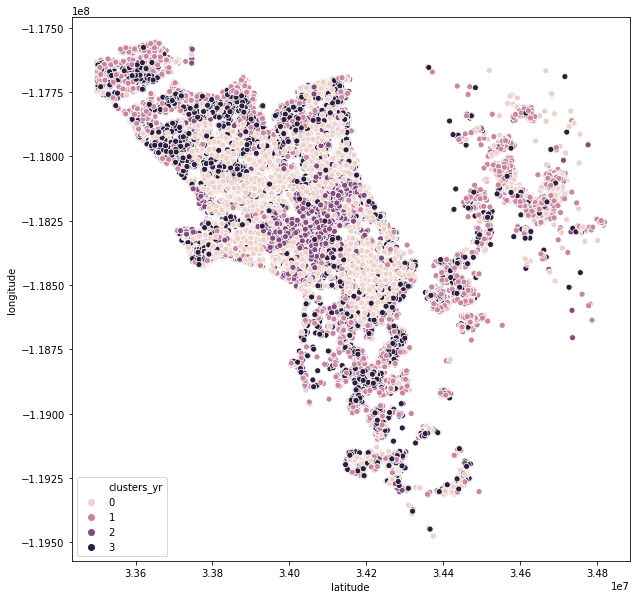

In [590]:
plt.figure(figsize=(10,10))
# sns.relplot(data=df_lat_and_long, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')
sns.scatterplot(data=df_single_units, x='latitude', y='longitude',hue='clusters_yr')
plt.legend()
plt.show()

<Figure size 1440x1440 with 0 Axes>

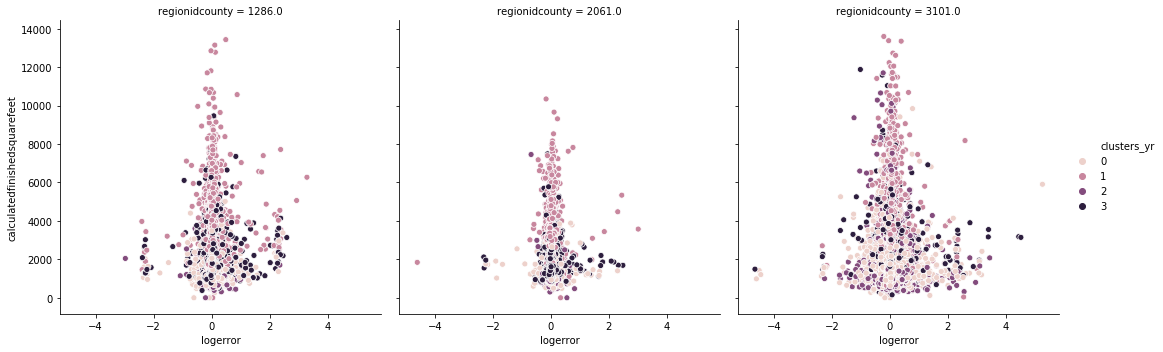

In [591]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='logerror', y='calculatedfinishedsquarefeet', hue='clusters_yr', col='regionidcounty')

# Feature Engineering

In [592]:
df_single_units.head()

parcelid          bathroomcnt           bedroomcnt  buildingqualitytypeid  \
0  11016594                 2.00                 3.00                   4.00   
1  14366692                 3.50                 4.00                   0.00   
2  12098116                 3.00                 2.00                   4.00   
5  11509835                 4.00                 4.00                   1.00   
6  12286022                 1.00                 2.00                   7.00   

   calculatedfinishedsquarefeet         garagecarcnt             latitude  \
0                      1,684.00                 0.00        34,280,990.00   
1                      2,263.00                 2.00        33,668,120.00   
2                      2,217.00                 0.00        34,136,312.00   
5                      3,067.00                 0.00        33,870,089.00   
6                      1,297.00                 0.00        33,899,475.00   

             longitude    lotsizesquarefeet propertycountylandusecode  \
0      -118,488,536.00             7,528.00                      0100   
1      -117,677,556.00             3,643.00                         1   
2      -118,175,032.00            11,423.00                      0100   
5      -118,402,768.00             2,708.00                      0100   
6      -118,212,720.00             6,677.00                      0100   

      ...                 logerror  transactiondate         logerror_abs  \
0     ...                     0.03       2016-01-01                 0.03   
1     ...                    -0.17       2016-01-01                 0.17   
2     ...                    -0.00       2016-01-01                 0.00   
5     ...                    -0.27       2016-01-02                 0.27   
6     ...                     0.04       2016-01-02                 0.04   

  logerror_bin  yearbuilt_bin  cluster_target clusters_lat_and_long  \
0            2              3               8                     6   
1            5              7               6                     2   
2            0              1               8                     1   
5            5              6               6                     0   
6            3              0               2                     0   

   clusters_home_size  clusters_home_size_loc clusters_yr  
0                   3                       6           0  
1                   2                       4           1  
2                   2                       2           0  
5                   5                       7           3  
6                   0                       7           0  

[5 rows x 32 columns]

In [594]:
df_multiunits.head()

parcelid          bathroomcnt           bedroomcnt  buildingqualitytypeid  \
3   12643413                 2.00                 2.00                   4.00   
7   17177301                 2.50                 3.00                   0.00   
8   14739064                 1.00                 2.00                   0.00   
9   14677559                 2.00                 2.00                   0.00   
13  14665244                 2.00                 2.00                   0.00   

    calculatedfinishedsquarefeet         garagecarcnt             latitude  \
3                         839.00                 0.00        33,755,800.00   
7                       1,763.00                 2.00        34,207,204.00   
8                         796.00                 1.00        33,549,600.00   
9                       1,260.00                 1.00        33,612,700.00   
13                      1,249.00                 0.00        33,670,900.00   

              longitude    lotsizesquarefeet propertycountylandusecode  \
3       -118,309,000.00            70,859.00                      010C   
7       -119,165,589.00                 0.00                      1129   
8       -117,678,000.00                 0.00                        34   
9       -117,742,000.00                 0.00                        34   
13      -117,844,000.00                 0.00                         1   

           ...             taxvaluedollarcnt  assessmentyear  \
3          ...                    244,880.00          2015.0   
7          ...                    306,000.00          2015.0   
8          ...                    210,064.00          2015.0   
9          ...                    190,960.00          2015.0   
13         ...                    601,000.00          2015.0   

   landtaxvaluedollarcnt            taxamount  airconditioningdesc  \
3              73,362.00             3,048.74              Central   
7             199,000.00             3,745.50                    0   
8             143,230.00             2,172.88                    0   
9              80,983.00             1,940.26                    0   
13            202,253.00             6,876.70                    0   

    heatingorsystemdesc propertylandusedesc             logerror  \
3               Central         Condominium                 0.02   
7                     0         Condominium                 0.16   
8                     0         Condominium                -0.00   
9                     0         Condominium                 0.08   
13                    0         Condominium                 0.08   

    transactiondate         logerror_abs  
3        2016-01-02                 0.02  
7        2016-01-02                 0.16  
8        2016-01-02                 0.00  
9        2016-01-03                 0.08  
13       2016-01-03                 0.08  

[5 rows x 25 columns]

In [595]:
df_single_units.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty',
       'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc', 'logerror', 'transactiondate', 'logerror_abs',
       'logerror_bin', 'yearbuilt_bin', 'cluster_target',
       'clusters_lat_and_long', 'clusters_home_size', 'clusters_home_size_loc',
       'clusters_yr'],
      dtype='object')

# Train/Test Split
## First on the Single Units Df

#### Only using the numeric columns to do the train/test split with Linear Regression

In [596]:
# test_train_split
X_singles = df_single_units.drop(columns=['parcelid','logerror'])
print(X_singles.head())

y_singles = df_single_units[['logerror']]
print(y_singles.head())

           bathroomcnt           bedroomcnt  buildingqualitytypeid  \
0                 2.00                 3.00                   4.00   
1                 3.50                 4.00                   0.00   
2                 3.00                 2.00                   4.00   
5                 4.00                 4.00                   1.00   
6                 1.00                 2.00                   7.00   

   calculatedfinishedsquarefeet         garagecarcnt             latitude  \
0                      1,684.00                 0.00        34,280,990.00   
1                      2,263.00                 2.00        33,668,120.00   
2                      2,217.00                 0.00        34,136,312.00   
5                      3,067.00                 0.00        33,870,089.00   
6                      1,297.00                 0.00        33,899,475.00   

             longitude    lotsizesquarefeet propertycountylandusecode  \
0      -118,488,536.00             7,528.00

In [597]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_singles, y_singles, train_size=.80, random_state=0)


In [598]:
train = pd.concat([X_train_s, y_train_s], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty', 'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'airconditioningdesc', 'heatingorsystemdesc', 'propertylandusedesc', 'transactiondate', 'logerror_abs', 'logerror_bin', 'yearbuilt_bin', 'cluster_target', 'clusters_lat_and_long', 'clusters_home_size', 'clusters_home_size_loc', 'clusters_yr', 'logerror']
Train dimensions (rows, columns): (88480, 31)


In [599]:
test = pd.concat([X_test_s, y_test_s], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty', 'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'airconditioningdesc', 'heatingorsystemdesc', 'propertylandusedesc', 'transactiondate', 'logerror_abs', 'logerror_bin', 'yearbuilt_bin', 'cluster_target', 'clusters_lat_and_long', 'clusters_home_size', 'clusters_home_size_loc', 'clusters_yr', 'logerror']
Test dimensions (rows, columns): (22121, 31)


In [600]:
if X_train_s.shape[0] == y_train_s.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test_s.shape[0] == y_test_s.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


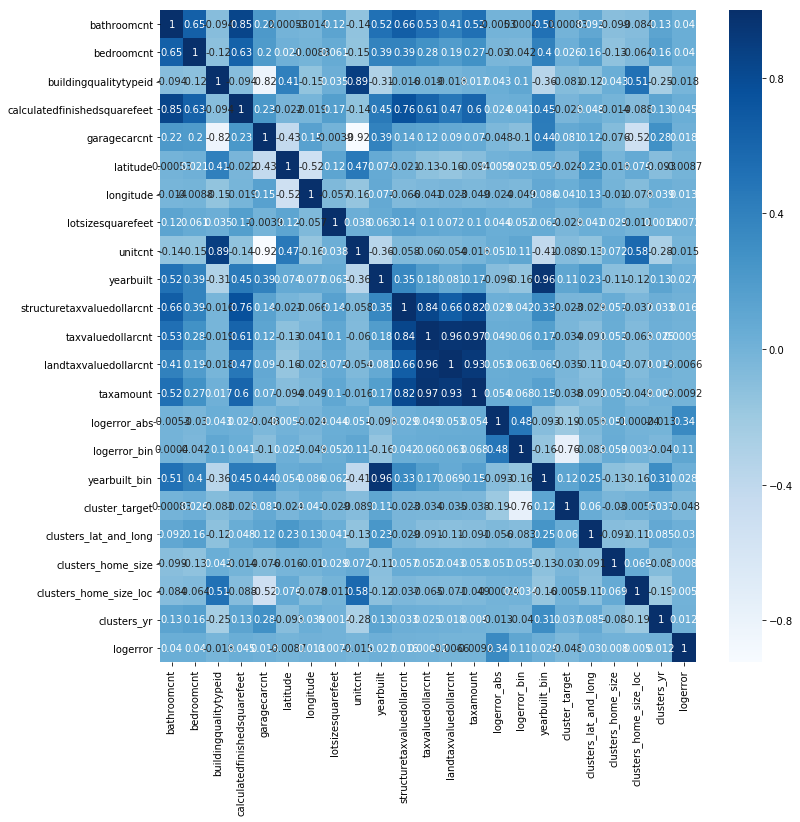

In [601]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

## Linear Regression Model

### LM 1 - Univariate with lotsizesquarefeet

In [602]:
# Create linear regression objects
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [603]:
# Fit/Train the Model
lm1.fit(X_train_s[['lotsizesquarefeet']], y_train_s)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.01399113]
[[4.41437242e-08]]


In [604]:
print('Univariate - final_exam = b + m1 * exam1 + m2 * exam3')
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])


Univariate - final_exam = b + m1 * exam1 + m2 * exam3
    y-intercept  (b): 0.01
    coefficient (m1): 0.00


In [605]:
y_pred_lm1 = lm1.predict(X_train_s[['lotsizesquarefeet']])


In [606]:
mse_lm1 = mean_squared_error(y_train_s, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 0.0273


In [607]:
r2_lm1 = r2_score(y_train_s, y_pred_lm1)
print('  {:.2%} of the variance in the logerror can be explained by the clusters.'.format(r2_lm1))

  0.01% of the variance in the logerror can be explained by the clusters.


Text(0, 0.5, 'Residuals')

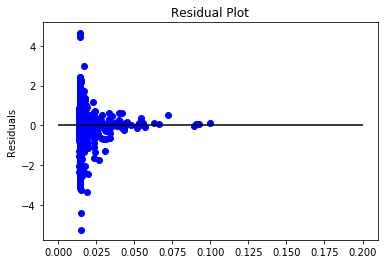

In [608]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train_s, c='Blue')
plt.hlines(y=0, xmin=0, xmax=.2)
plt.title("Residual Plot")
plt.ylabel('Residuals')

### LM 2 - Multivariate with 3 clusters

In [609]:
# Create linear regression objects
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [610]:
# Fit/Train the Model
lm2.fit(X_train_s[['clusters_lat_and_long', 'clusters_home_size','clusters_yr']], y_train_s)
print(lm2)

lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.00331079]
[[0.00201174 0.00082429 0.00142495]]


In [611]:
print('Multivariate - final_exam = b + m1 * c + m2 * c')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])

Multivariate - final_exam = b + m1 * c + m2 * c
    y-intercept  (b): 0.00
    coefficient (m1): 0.00
    coefficient (m2): 0.00


In [612]:
y_pred_lm2 = lm2.predict(X_train_s[['clusters_lat_and_long', 'clusters_home_size','clusters_yr']])

In [613]:
mse_lm2 = mean_squared_error(y_train_s, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

lm2
  mse: 0.0272


In [614]:
r2_lm2 = r2_score(y_train_s, y_pred_lm2)
print('  {:.2%} of the variance in the logerror can be explained by the clusters.'.format(r2_lm2))

  0.11% of the variance in the logerror can be explained by the clusters.


Text(0, 0.5, 'Residuals')

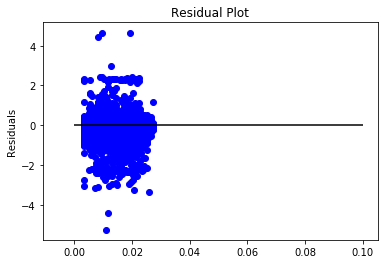

In [615]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_train_s, c='Blue')
plt.hlines(y=0, xmin=0, xmax=.1)
plt.title("Residual Plot")
plt.ylabel('Residuals')

### LM 3 - Multivariate with 1 cluster, YEARBUILT

In [616]:
# Create linear regression objects
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [617]:
# Fit/Train the Model
lm3.fit(X_train_s[['clusters_yr']], y_train_s)
print(lm3)

lm3_y_intercept = lm3.intercept_
print(lm2_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.00331079]
[[0.00164561]]


In [618]:
print('Univariate - final_exam = b + m1 * c + m2 * c')
print('    y-intercept  (b): %.2f' % lm3_y_intercept)
print('    coefficient (m1): %.2f' % lm3_coefficients[0])


Univariate - final_exam = b + m1 * c + m2 * c
    y-intercept  (b): 0.01
    coefficient (m1): 0.00


In [619]:
y_pred_lm3 = lm3.predict(X_train_s[['clusters_yr']])

In [620]:
mse_lm3 = mean_squared_error(y_train_s, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3))

lm3
  mse: 0.0273


In [621]:
r2_lm3 = r2_score(y_train_s, y_pred_lm3)
print('  {:.2%} of the variance in the logerror can be explained by the clusters.'.format(r2_lm3))

  0.02% of the variance in the logerror can be explained by the clusters.


Text(0, 0.5, 'Residuals')

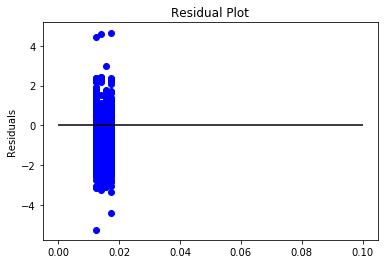

In [622]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_train_s, c='Blue')
plt.hlines(y=0, xmin=0, xmax=.1)
plt.title("Residual Plot")
plt.ylabel('Residuals')

# Train/Test Split
## Now on the Multiunits Df

#### Only using the numeric columns to do the train/test split with Linear Regression

In [692]:
# test_train_split
X_multi = df_multiunits.drop(columns=['parcelid','logerror'])
print(X_multi.head())

y_multi = df_multiunits[['logerror']]
print(y_multi.head())

            bathroomcnt           bedroomcnt  buildingqualitytypeid  \
3                  2.00                 2.00                   4.00   
7                  2.50                 3.00                   0.00   
8                  1.00                 2.00                   0.00   
9                  2.00                 2.00                   0.00   
13                 2.00                 2.00                   0.00   

    calculatedfinishedsquarefeet         garagecarcnt             latitude  \
3                         839.00                 0.00        33,755,800.00   
7                       1,763.00                 2.00        34,207,204.00   
8                         796.00                 1.00        33,549,600.00   
9                       1,260.00                 1.00        33,612,700.00   
13                      1,249.00                 0.00        33,670,900.00   

              longitude    lotsizesquarefeet propertycountylandusecode  \
3       -118,309,000.00       

In [693]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, train_size=.80, random_state=0)


In [694]:
train_m = pd.concat([X_train_m, y_train_m], axis=1)
print("Train columns:  %s" % list(train_m.columns))
print("Train dimensions (rows, columns):", train_m.shape)

Train columns:  ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty', 'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'airconditioningdesc', 'heatingorsystemdesc', 'propertylandusedesc', 'transactiondate', 'logerror_abs', 'clusters_loc2', 'clusters_size2', 'yearbuilt_bin', 'clusters_yr2', 'logerror']
Train dimensions (rows, columns): (37103, 28)


In [695]:
test_m = pd.concat([X_test_m, y_test_m], axis=1)
print("Test columns:  %s" % list(test_m.columns))
print("Test dimensions (rows, columns):", test_m.shape)

Test columns:  ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty', 'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'airconditioningdesc', 'heatingorsystemdesc', 'propertylandusedesc', 'transactiondate', 'logerror_abs', 'clusters_loc2', 'clusters_size2', 'yearbuilt_bin', 'clusters_yr2', 'logerror']
Test dimensions (rows, columns): (9276, 28)


In [696]:
if X_train_m.shape[0] == y_train_m.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test_m.shape[0] == y_test_m.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train_m.shape[1] == test_m.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train_m.shape[0] / (train_m.shape[0] + test_m.shape[0])
test_split = test_m.shape[0] / (train_m.shape[0] + test_m.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


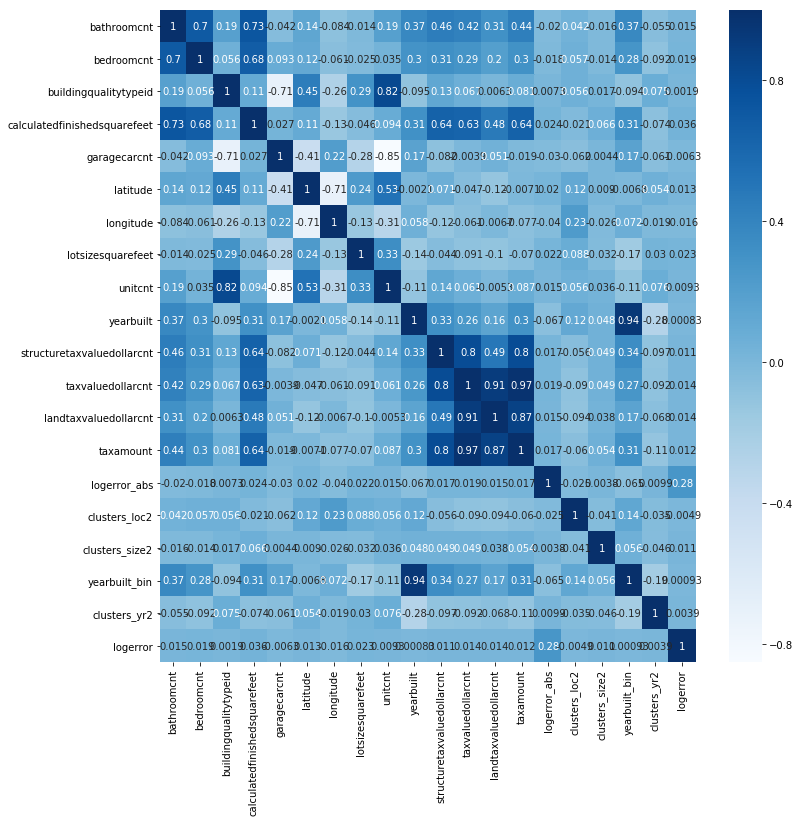

In [697]:
plt.figure(figsize=(12,12))
sns.heatmap(train_m.corr(), cmap='Blues', annot=True)

## Clustering on the Multiunits Df

### Location

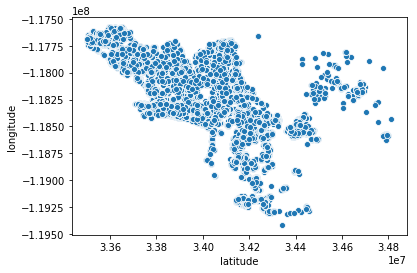

In [644]:
df_lat_and_long2 = df_multiunits[['latitude','longitude']]
sns.scatterplot(data=df_lat_and_long2, x='latitude', y='longitude',)
plt.show()

In [645]:
df_lat_and_long2.head()

latitude            longitude
3         33,755,800.00      -118,309,000.00
7         34,207,204.00      -119,165,589.00
8         33,549,600.00      -117,678,000.00
9         33,612,700.00      -117,742,000.00
13        33,670,900.00      -117,844,000.00

     k                      sse
0    1 9,521,484,556,621,740.00
1    2 3,723,983,190,008,980.50
2    3 2,345,173,545,093,734.00
3    4 1,669,353,026,793,993.75
4    5 1,234,550,622,557,462.50
5    6   966,639,817,197,860.75
6    7   818,240,626,836,773.75
7    8   679,212,346,523,168.00
8    9   579,527,922,386,187.00
9   10   507,215,243,336,215.81
10  11   438,717,001,004,096.38
11  12   377,912,348,756,265.38
12  13   337,456,644,876,412.75
13  14   297,230,131,025,577.56


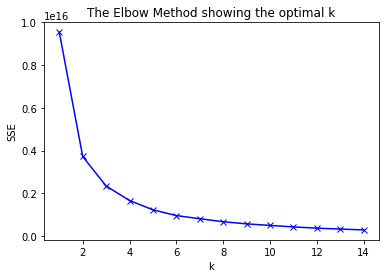

In [646]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_lat_and_long2)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [647]:
kmeans6 = KMeans(n_clusters=8)
kmeans6.fit(df_lat_and_long2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [648]:
kmeans6.predict(df_lat_and_long2)

array([2, 4, 6, ..., 2, 3, 3], dtype=int32)

In [649]:
df_lat_and_long2.head()

latitude            longitude
3         33,755,800.00      -118,309,000.00
7         34,207,204.00      -119,165,589.00
8         33,549,600.00      -117,678,000.00
9         33,612,700.00      -117,742,000.00
13        33,670,900.00      -117,844,000.00

In [650]:
df_lat_and_long2['cluster_target'] = kmeans6.predict(df_lat_and_long2)
# df_lat_and_long.cluster_target = 'cluster_' + (df_single_units.cluster_target + 1).astype('str')
# df_lat_and_long.head()


In [651]:
centers2 = pd.DataFrame(kmeans6.cluster_centers_,columns=['latitude','longitude'])
centers2.head()

latitude            longitude
0        34,196,382.55      -118,719,294.44
1        33,753,133.22      -117,883,900.20
2        33,821,987.25      -118,250,955.76
3        34,091,354.75      -118,393,930.06
4        34,220,723.40      -119,147,120.33

In [654]:
df_multiunits['clusters_loc2'] = df_lat_and_long2['cluster_target']

In [655]:
df_multiunits.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'regionidcounty',
       'unitcnt', 'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc', 'logerror', 'transactiondate', 'logerror_abs',
       'clusters_loc2'],
      dtype='object')

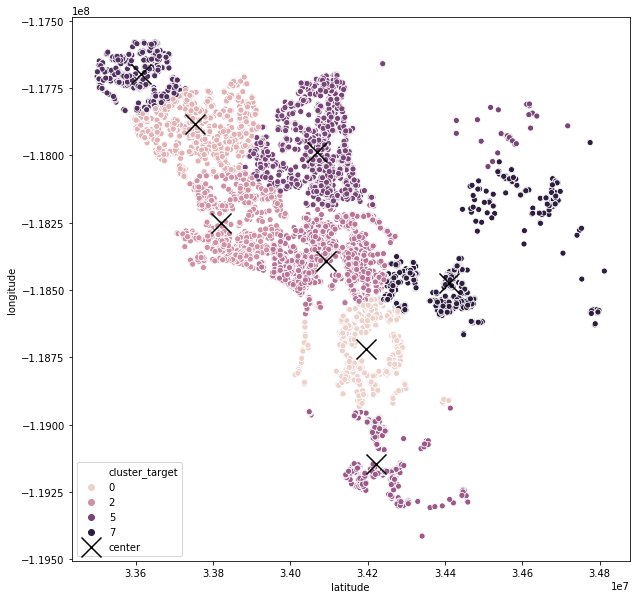

In [653]:
plt.figure(figsize=(10,10))
# sns.relplot(data=df_lat_and_long, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')
sns.scatterplot(data=df_lat_and_long2, x='latitude', y='longitude',hue='cluster_target')
plt.scatter(centers2.latitude, centers2.longitude, s=400, marker='x', c='black', label='center')
plt.legend()
plt.show()

# Clustering
## Size

In [656]:
df_size2 = df_multiunits[['calculatedfinishedsquarefeet']]

In [657]:
df_size2.head()

calculatedfinishedsquarefeet
3                         839.00
7                       1,763.00
8                         796.00
9                       1,260.00
13                      1,249.00

     k                  sse
0    1    15,157,931,979.77
1    2     7,165,786,976.19
2    3     4,103,333,797.15
3    4     2,609,435,733.32
4    5     1,771,234,213.53
5    6     1,307,271,011.59
6    7       977,504,466.74
7    8       763,812,825.37
8    9       607,580,901.01
9   10       494,812,253.99
10  11       414,827,396.67
11  12       353,707,671.54
12  13       297,224,947.21
13  14       256,344,611.61


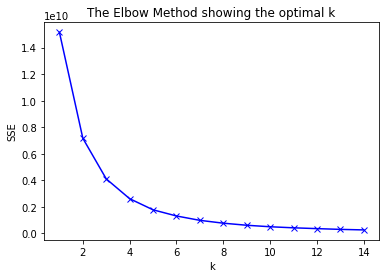

In [658]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_size2)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [661]:
kmeans7 = KMeans(n_clusters=8)
kmeans7.fit(df_size2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [662]:
kmeans7.predict(df_size2)

array([6, 7, 6, ..., 1, 3, 7], dtype=int32)

In [663]:
df_size2['cluster_target'] = kmeans7.predict(df_size2)

In [664]:
df_multiunits['clusters_size2'] = df_size2['cluster_target']

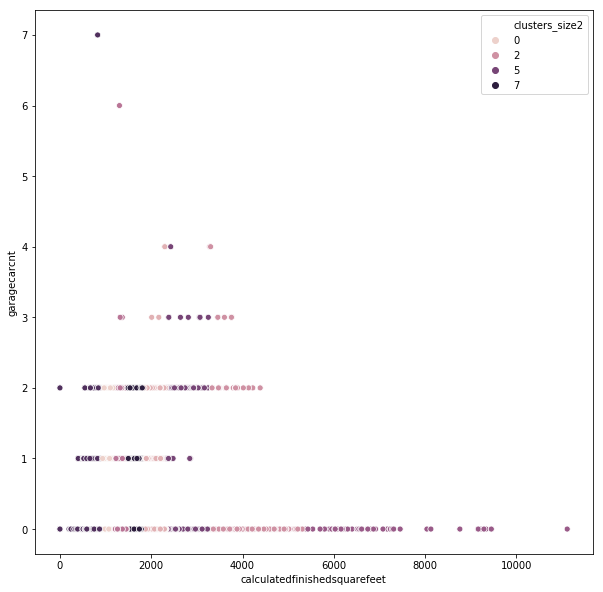

In [665]:
plt.figure(figsize=(10,10))
# sns.relplot(data=df_lat_and_long, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')
sns.scatterplot(data=df_multiunits, x='calculatedfinishedsquarefeet', y='garagecarcnt',hue='clusters_size2')
plt.legend()
plt.show()

<Figure size 1440x1440 with 0 Axes>

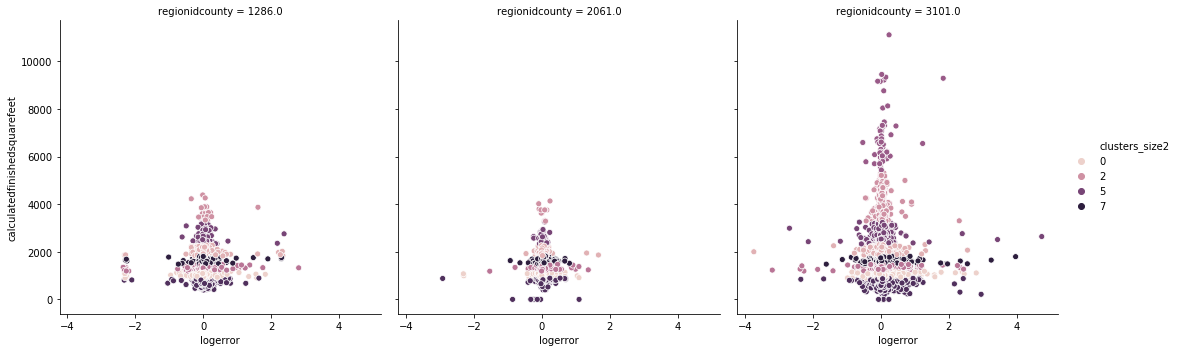

In [666]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_multiunits, x='logerror', y='calculatedfinishedsquarefeet', hue='clusters_size2', col='regionidcounty')

# Clustering
## Year Built

In [675]:
df_multiunits.yearbuilt = df_multiunits.yearbuilt.astype('float64')

In [676]:
df_multiunits.yearbuilt.dtype

dtype('float64')

In [677]:
df_multiunits['yearbuilt_bin'] = pd.qcut(df_multiunits.yearbuilt, 8, labels=False)

In [678]:
df_yr2 = df_multiunits[['yearbuilt']]

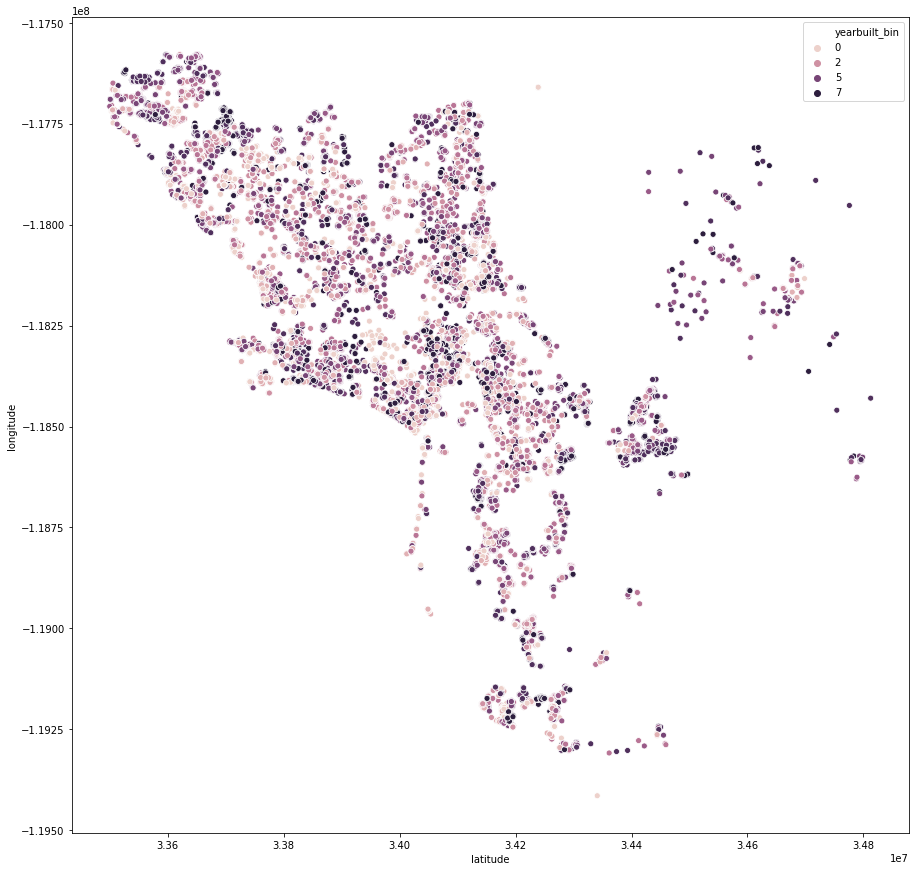

In [679]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_multiunits, x='latitude', y='longitude',hue='yearbuilt_bin')
plt.show()

     k                  sse
0    1         9,430,571.77
1    2         3,691,791.80
2    3         1,877,475.05
3    4         1,054,677.56
4    5           668,099.75
5    6           459,488.55
6    7           314,383.14
7    8           252,996.59
8    9           209,543.64
9   10           169,872.00
10  11           148,488.40
11  12           123,047.22
12  13           104,457.13
13  14            94,778.56


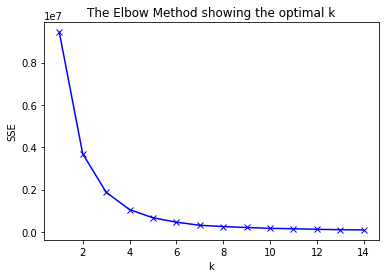

In [680]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_yr2)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [681]:
kmeans8 = KMeans(n_clusters=6)
kmeans8.fit(df_yr2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [682]:
kmeans8.predict(df_yr2)

array([2, 2, 4, ..., 1, 0, 4], dtype=int32)

In [684]:
df_yr2['cluster_target'] = kmeans8.predict(df_yr2)

In [685]:
df_yr2.head()

yearbuilt  cluster_target
3              1,987.00               2
7              1,994.00               2
8              1,984.00               4
9              1,977.00               0
13             2,005.00               1

In [686]:
df_multiunits['clusters_yr2'] = df_yr2['cluster_target']

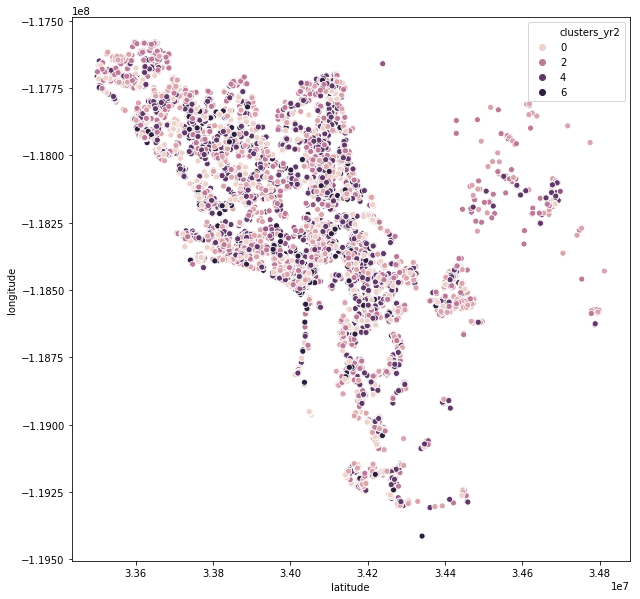

In [687]:
plt.figure(figsize=(10,10))
# sns.relplot(data=df_lat_and_long, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')
sns.scatterplot(data=df_multiunits, x='latitude', y='longitude',hue='clusters_yr2')
plt.legend()
plt.show()

<Figure size 1440x1440 with 0 Axes>

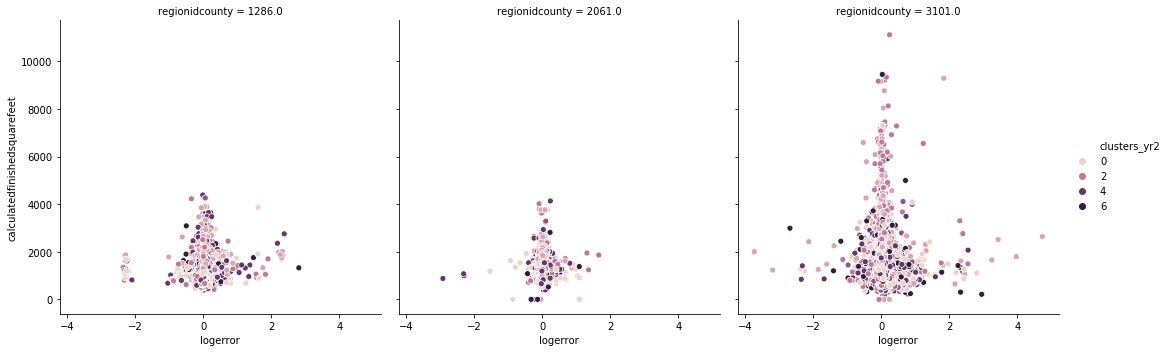

In [688]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_multiunits, x='logerror', y='calculatedfinishedsquarefeet', hue='clusters_yr2', col='regionidcounty')

### LM 4- Multivariate with 3 clusters -- ON MULTIUNITS DF

In [698]:
# Create linear regression objects
lm4 = LinearRegression()
print(lm4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [700]:
# Fit/Train the Model
lm4.fit(X_train_m[['clusters_loc2', 'clusters_size2','clusters_yr2']], y_train_m)
print(lm4)

lm4_y_intercept = lm4.intercept_
print(lm4_y_intercept)

lm4_coefficients = lm4.coef_
print(lm4_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.01014732]
[[-0.00028321  0.0005722   0.00035941]]


In [701]:
print('Multivariate - final_exam = b + m1 * c + m2 * c')
print('    y-intercept  (b): %.2f' % lm4_y_intercept)
print('    coefficient (m1): %.2f' % lm4_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm4_coefficients[0][1])

Multivariate - final_exam = b + m1 * c + m2 * c
    y-intercept  (b): 0.01
    coefficient (m1): -0.00
    coefficient (m2): 0.00


In [702]:
y_pred_lm4 = lm4.predict(X_train_m[['clusters_loc2', 'clusters_size2','clusters_yr2']])

In [703]:
mse_lm4 = mean_squared_error(y_train_m, y_pred_lm4)
print("lm4\n  mse: {:.3}".format(mse_lm4)) 

lm4
  mse: 0.0193


In [704]:
r2_lm4 = r2_score(y_train_m, y_pred_lm4)
print('  {:.2%} of the variance in the logerror can be explained by the clusters.'.format(r2_lm4))

  0.02% of the variance in the logerror can be explained by the clusters.


Text(0, 0.5, 'Residuals')

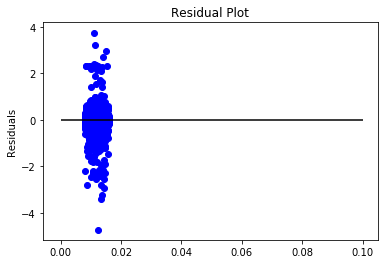

In [705]:
plt.scatter(y_pred_lm4, y_pred_lm4 - y_train_m, c='Blue')
plt.hlines(y=0, xmin=0, xmax=.1)
plt.title("Residual Plot")
plt.ylabel('Residuals')